# Plotting agreement of the subjects over time from the Jet or Not workflow. Sorted by SOL/ HEK event
## Need: subjects_T0.csv
This jupyter notebook plots the results of the Jet or No question, the Jet distribution over the subjects of the reported HEK event  
Since the subjects are shorter than research to the duration of solar jets has shown us, we expect jets appearing in multiple subjects.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import datetime
from matplotlib.dates import DateFormatter
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from IPython.display import Image

%matplotlib inline

Read in the subject files made by make_T0_csvfiles.py  

In [2]:
subjects,obs_time,end_date,ans,agreement,subject_file, subject_sol=np.loadtxt('subjects_{}.csv'.format('T0'),delimiter=',',unpack=True,dtype=str)
obs_time=np.array(obs_time,dtype='datetime64')
end_date=np.array(end_date,dtype='datetime64')
subjects=subjects.astype(int)
agreement=agreement.astype(float)

In [3]:
def make_SOL_folder(SOL_name):
    path = 'SOL/Agreement_{}/'.format(SOL_name)
    #check if folder for plots exists
    isExist = os.path.exists(path)
    if not isExist: 
      os.makedirs(path)
      print("Agreement_{} directory is created".format(SOL_name))
        
        
make_SOL_folder('SOL_T0')

0


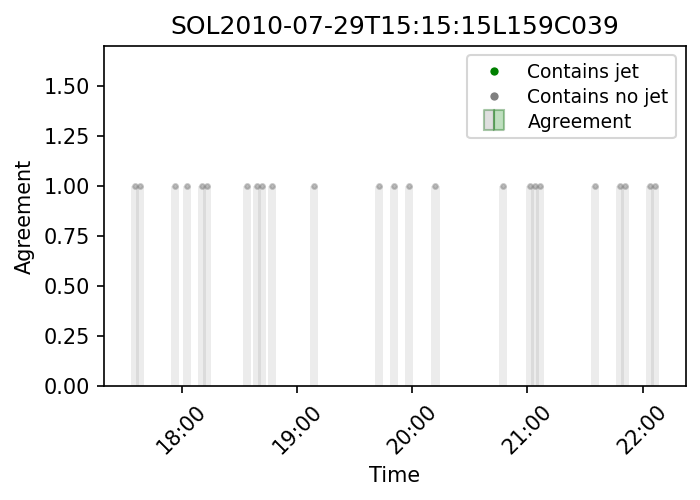

24


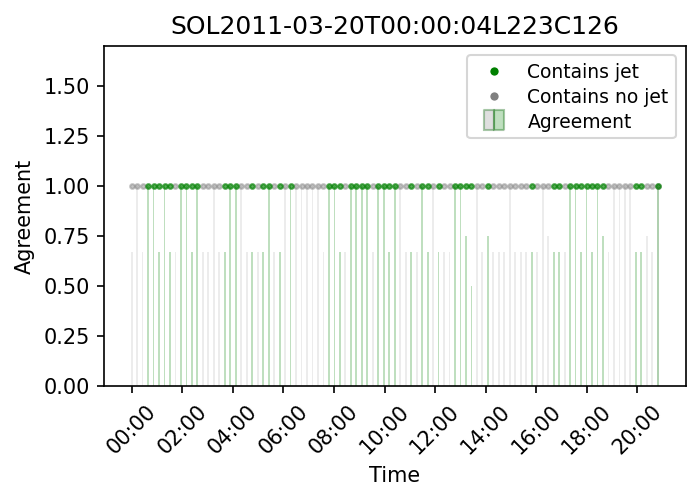

122


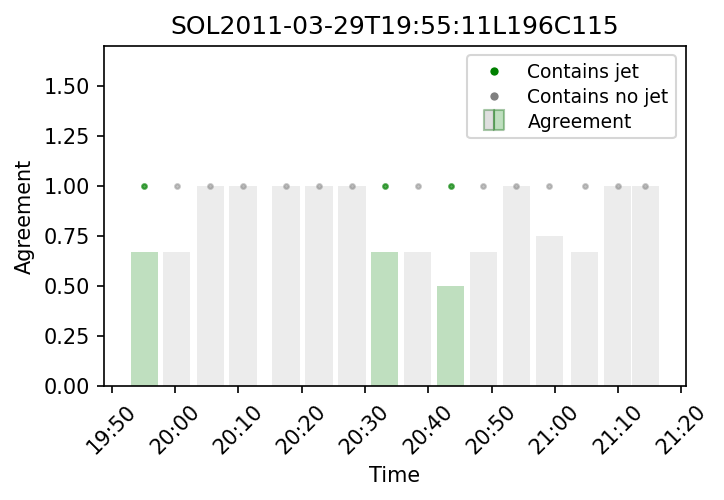

138


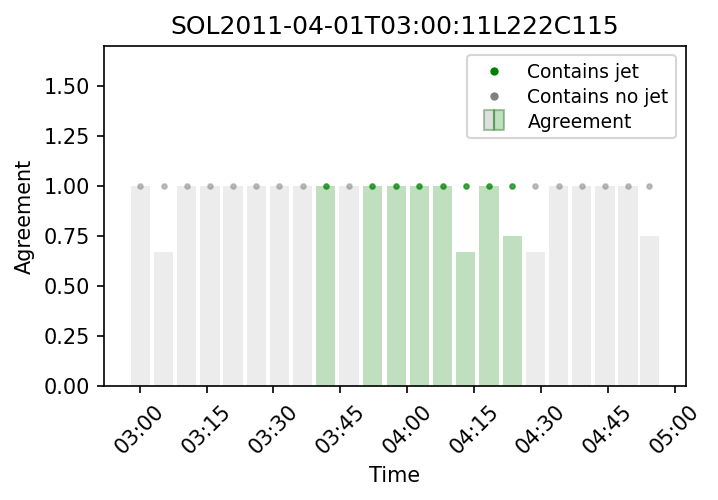

161


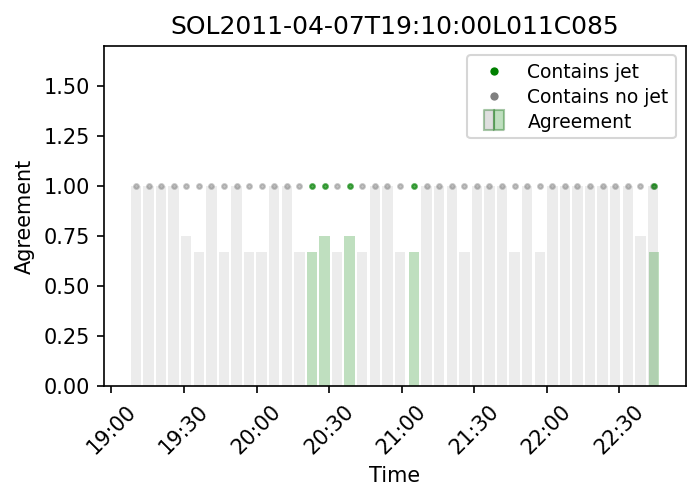

204


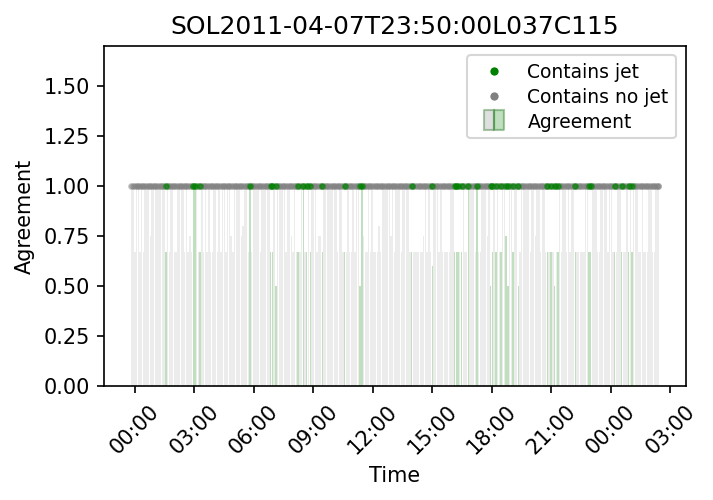

512


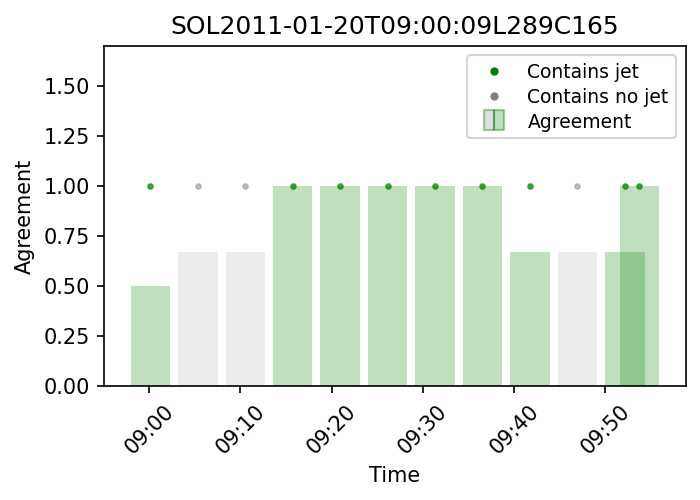

524


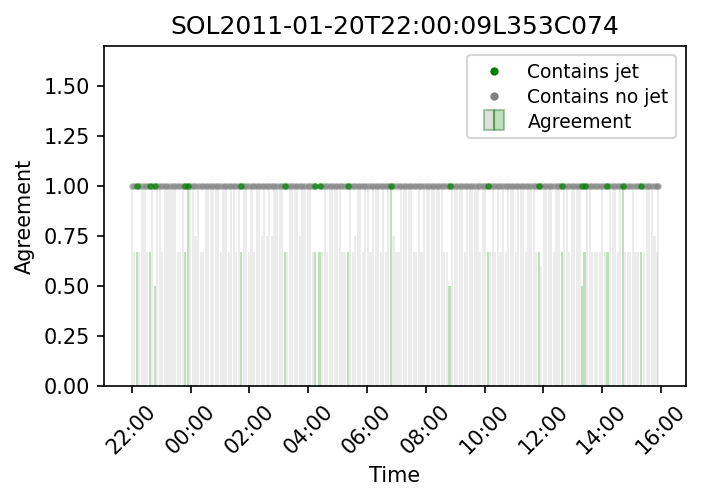

731


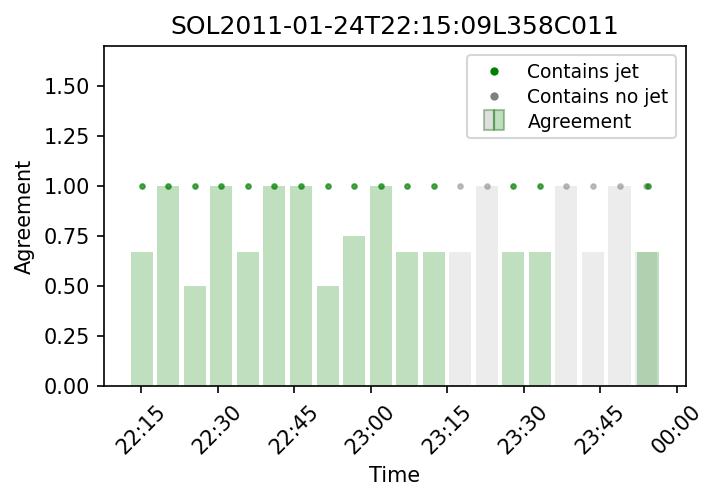

752


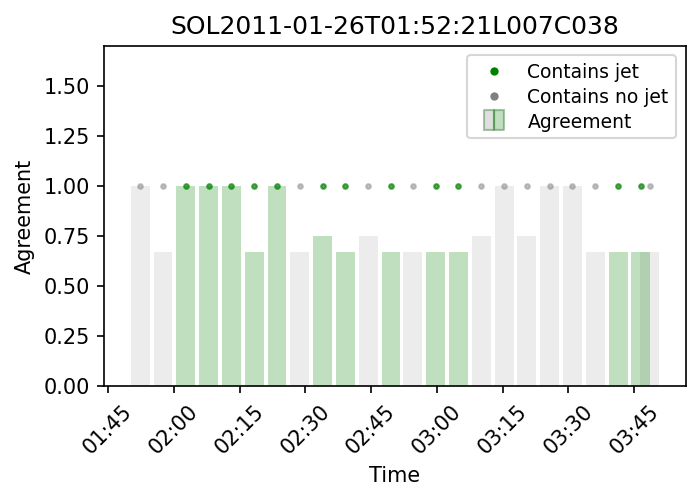

776


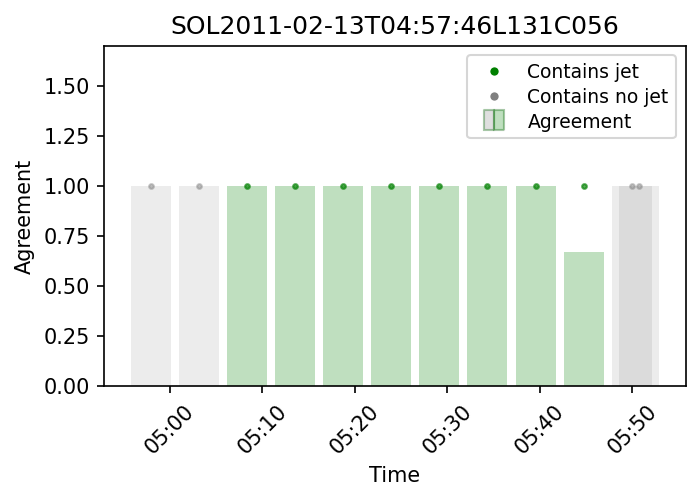

788


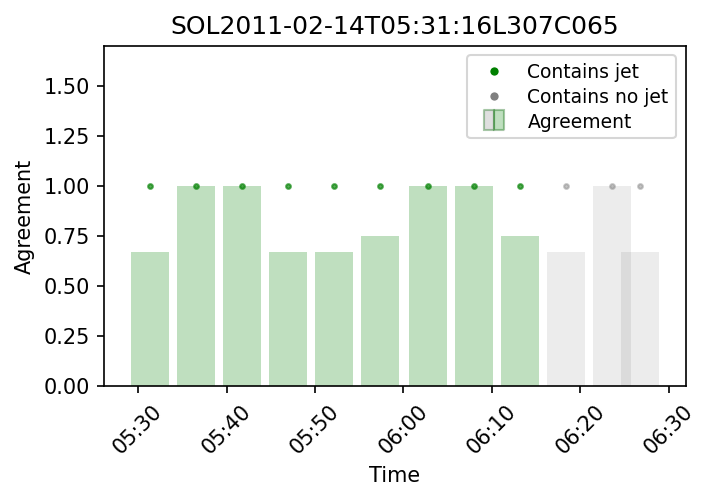

800


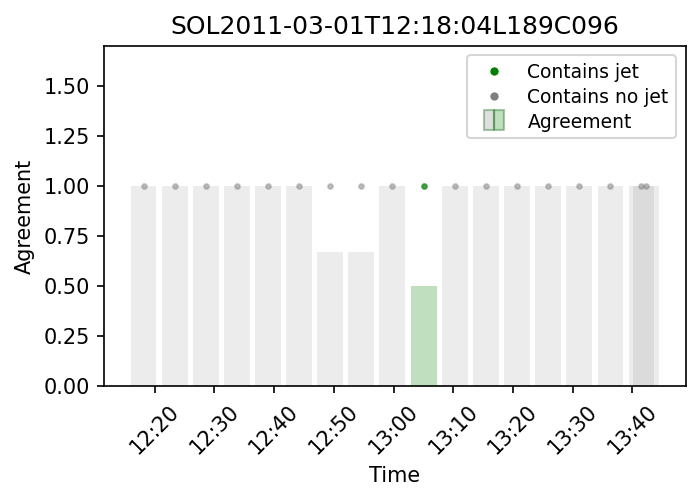

818


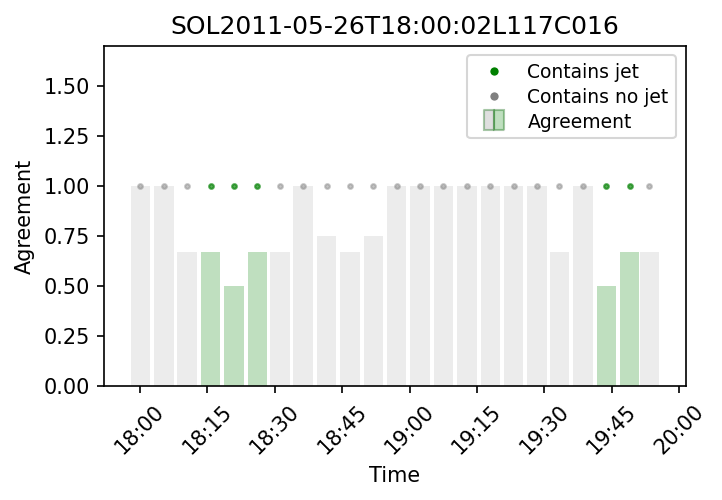

841


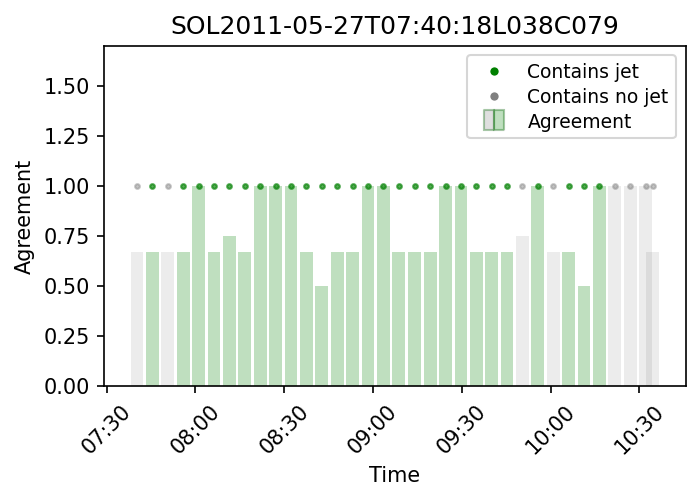

876


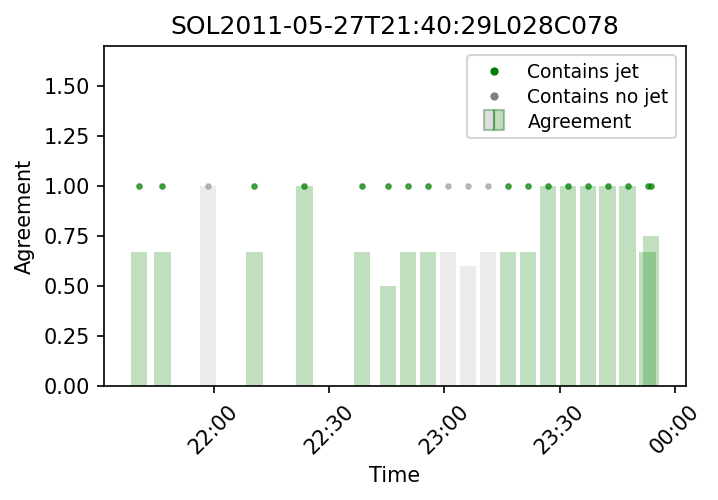

897


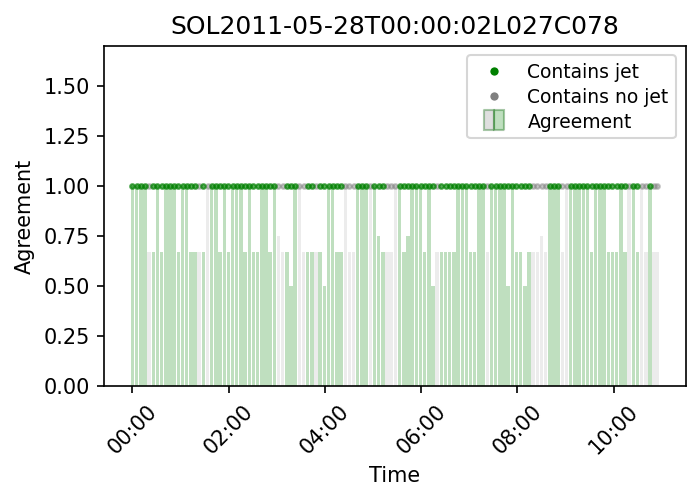

1024


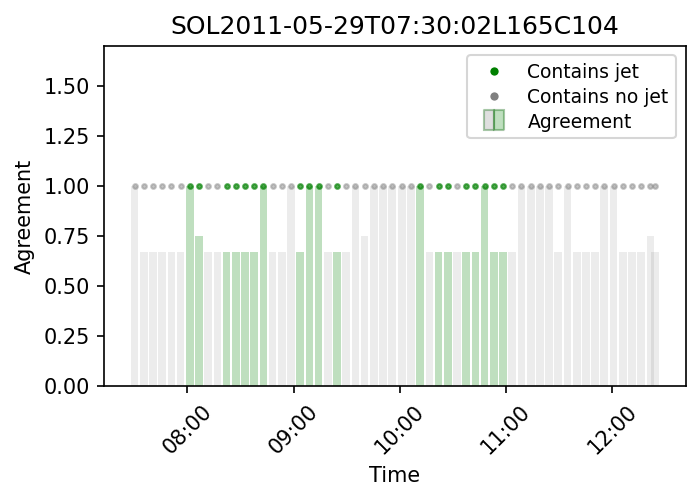

1082


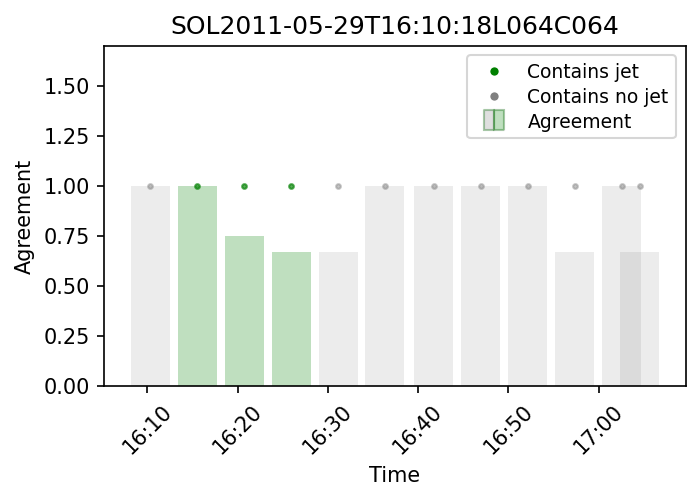

1094


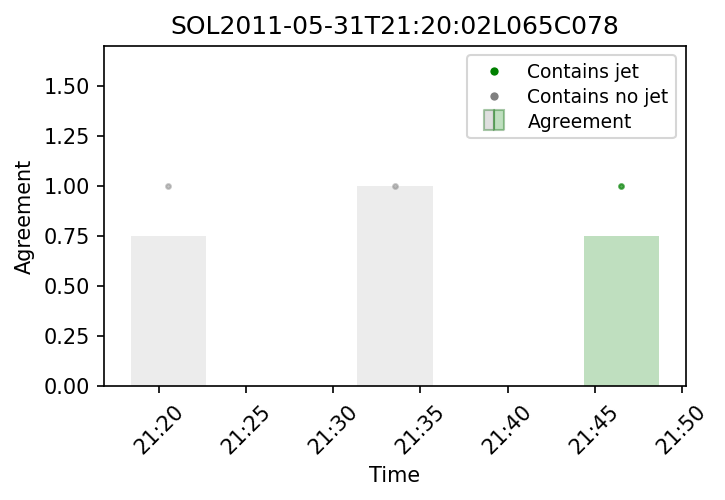

1097


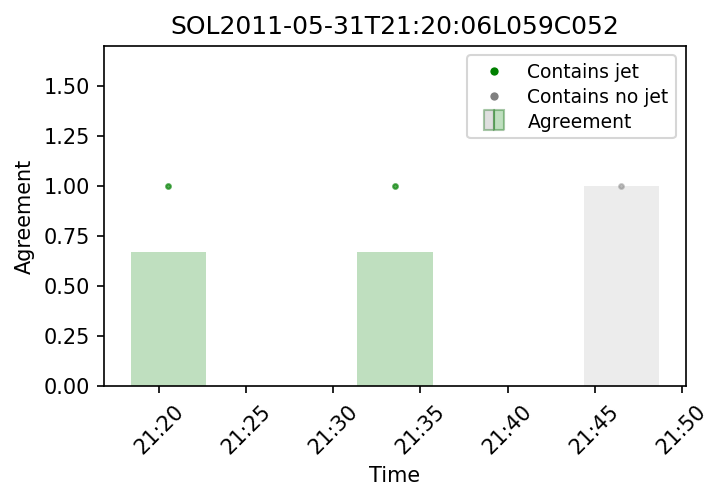

1100


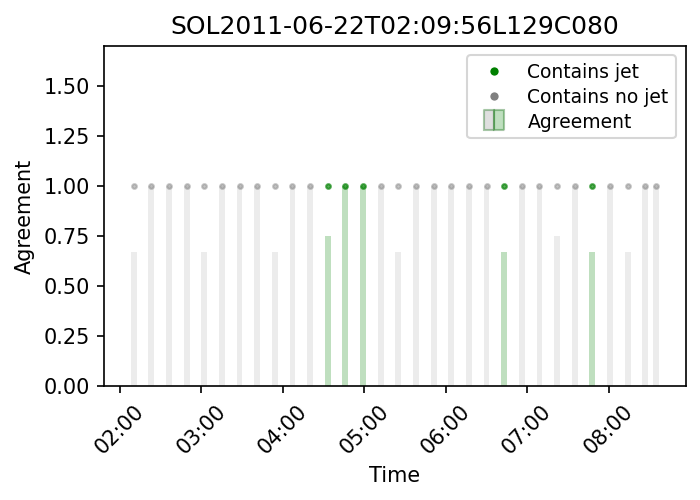

1131


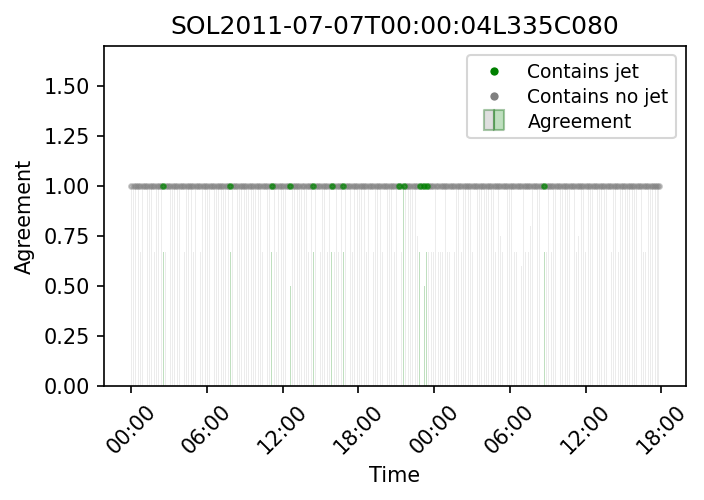

1361


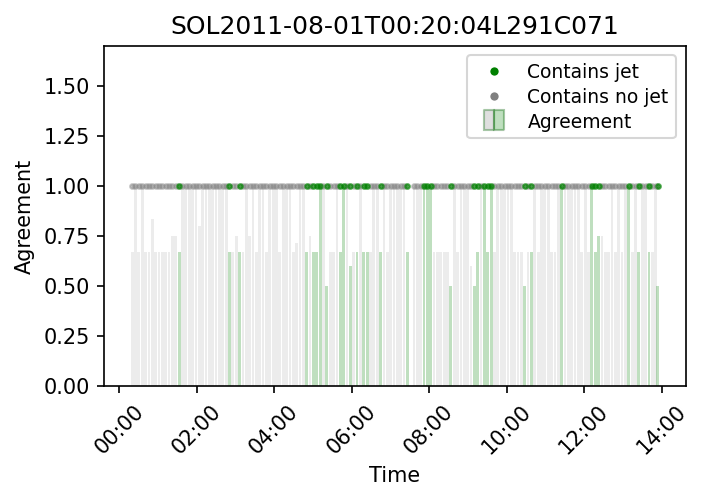

1518


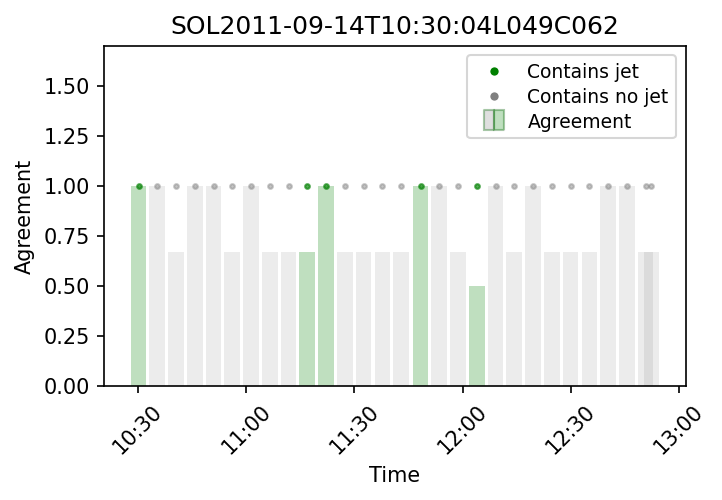

1547


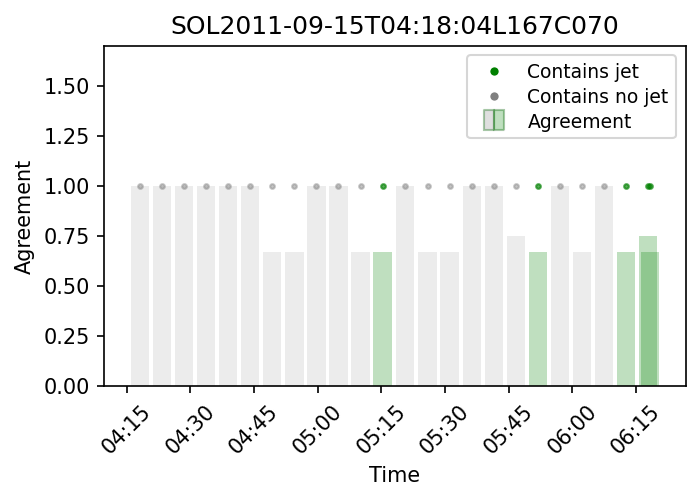

1572


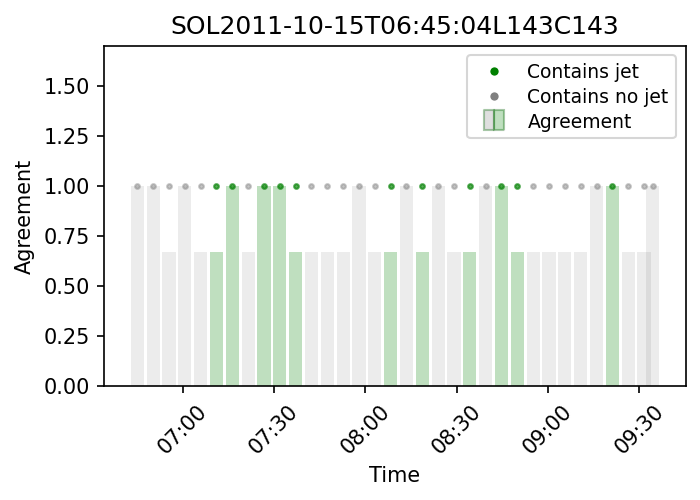

1606


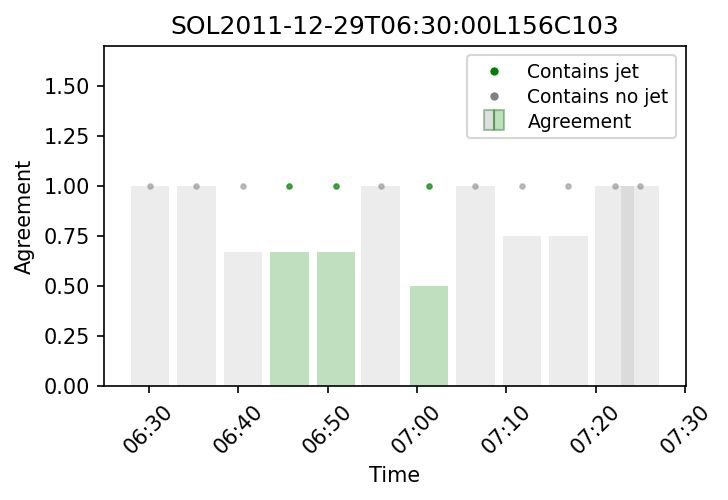

1618


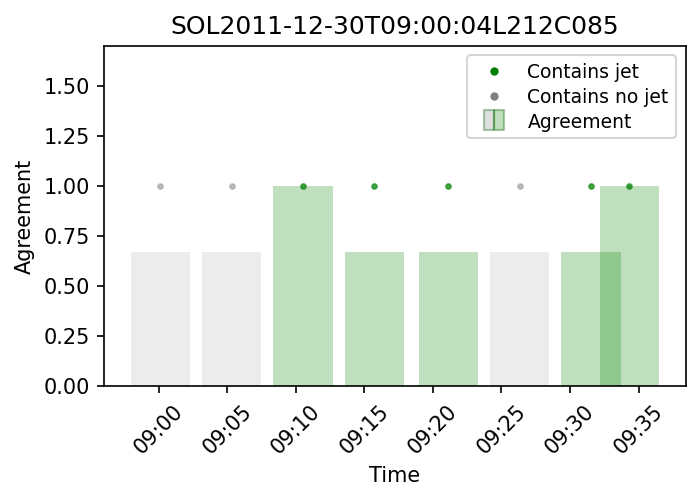

1626


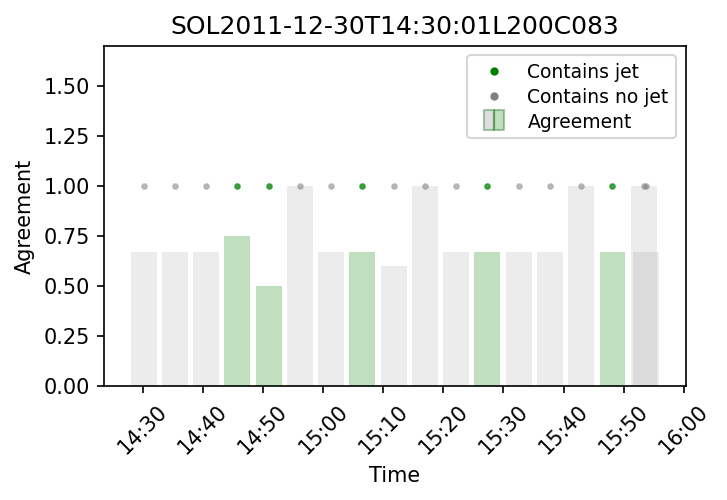

1644


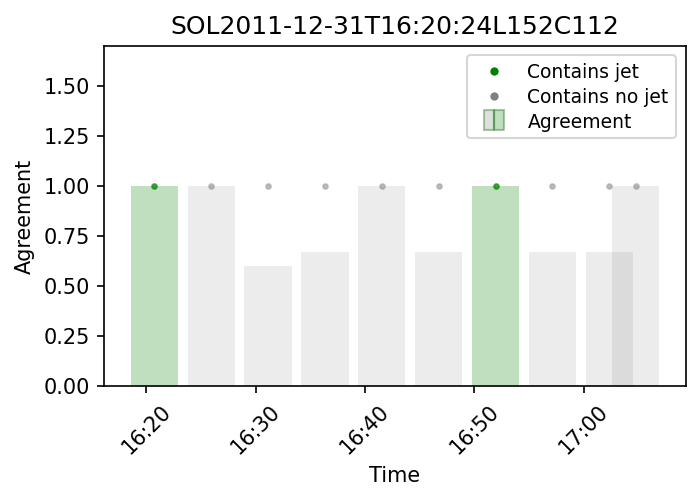

1654


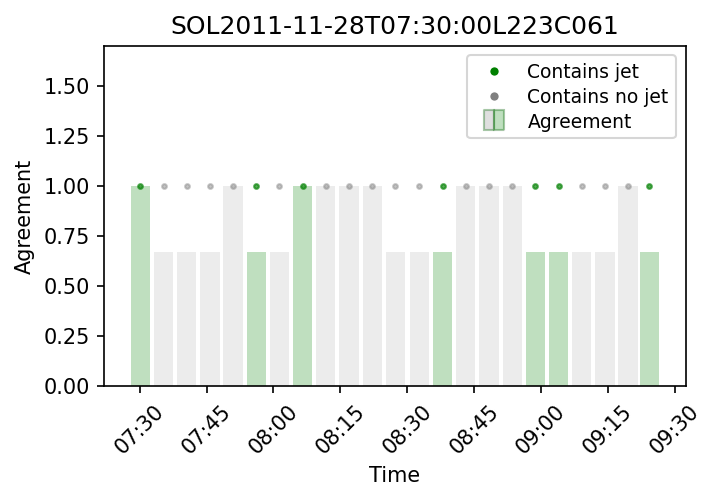

1677


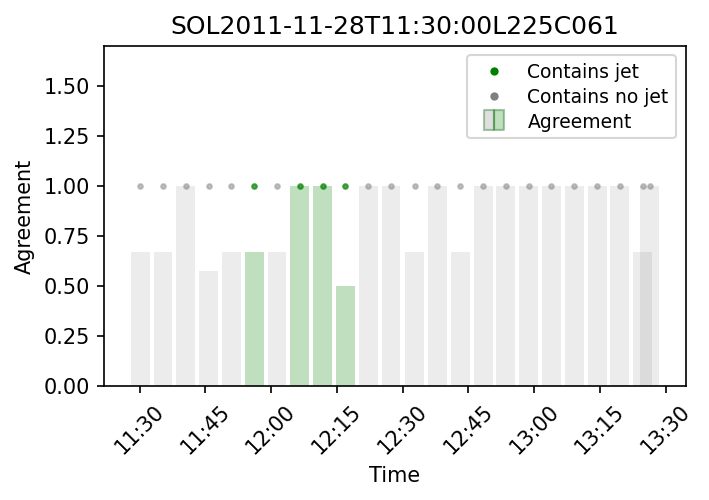

1701


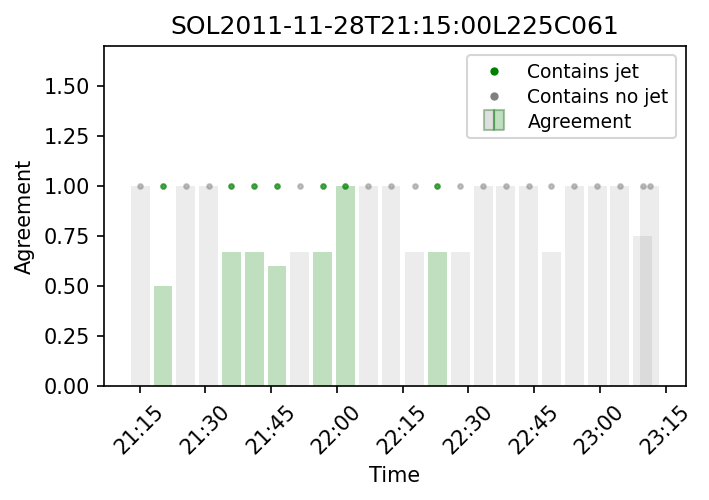

1725


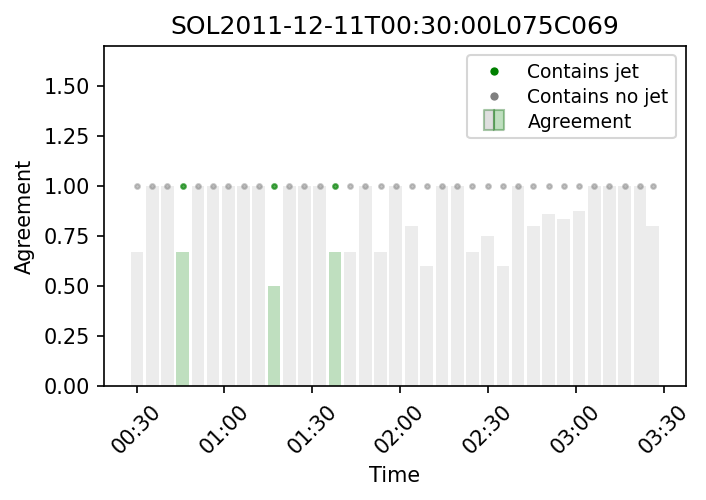

1760


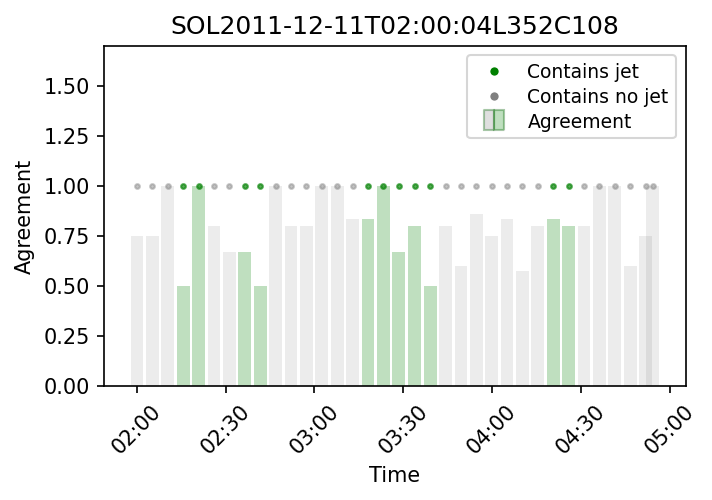

1795


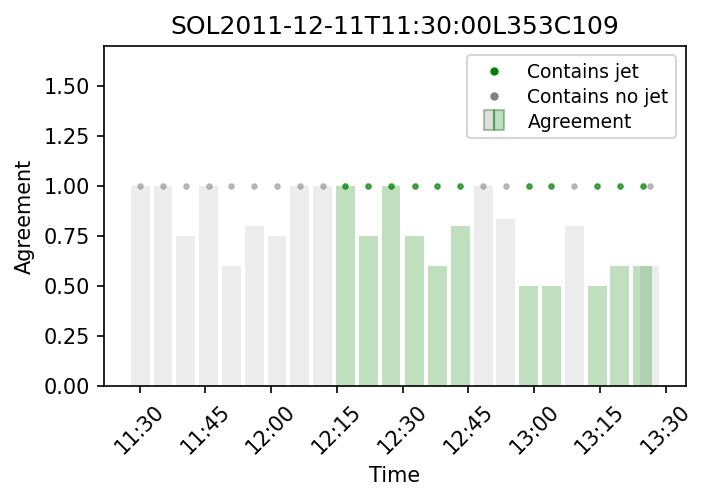

1819


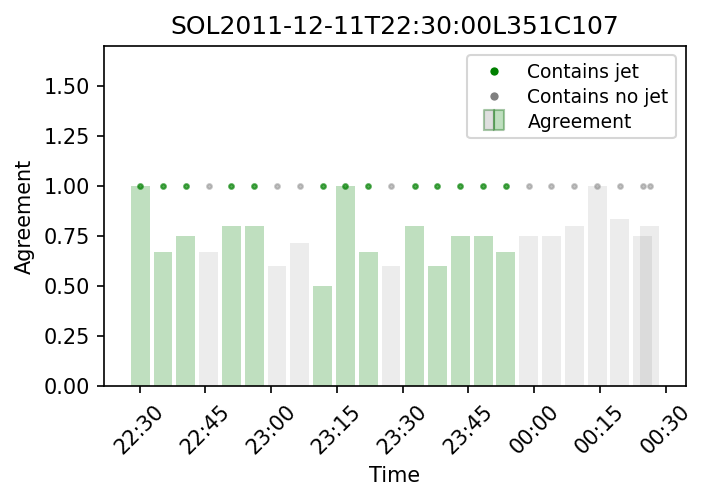

1843


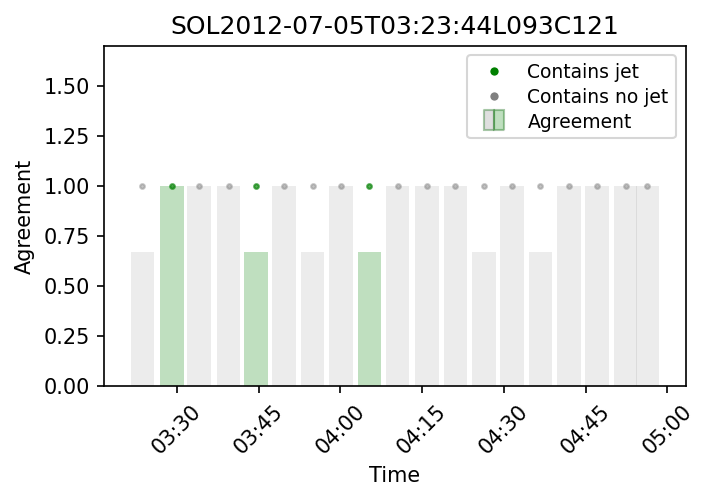

1862


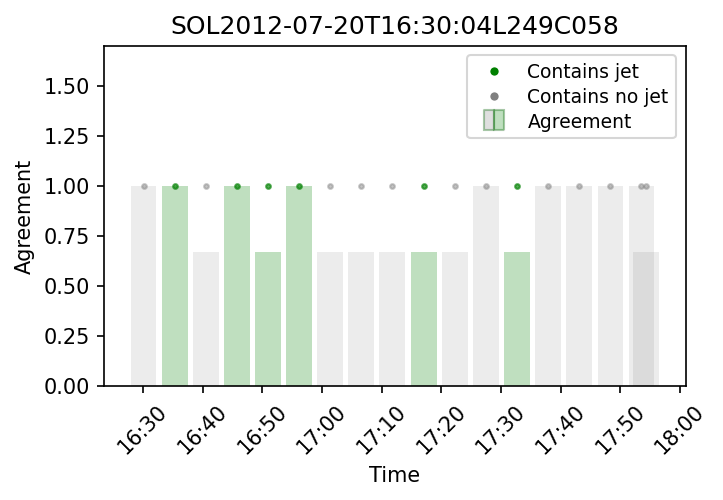

1880


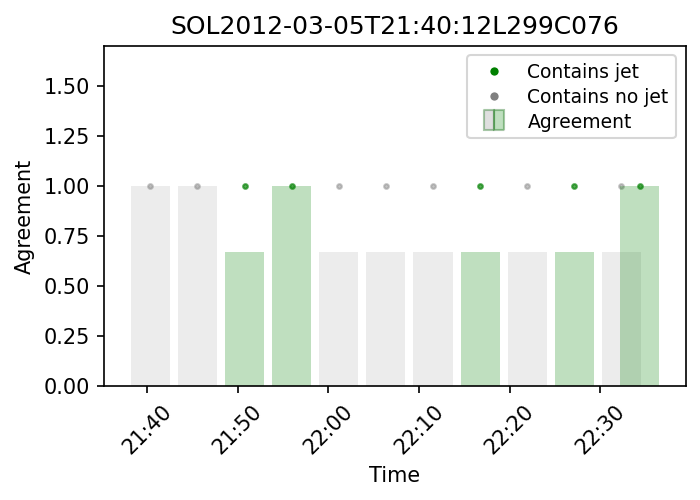

1892


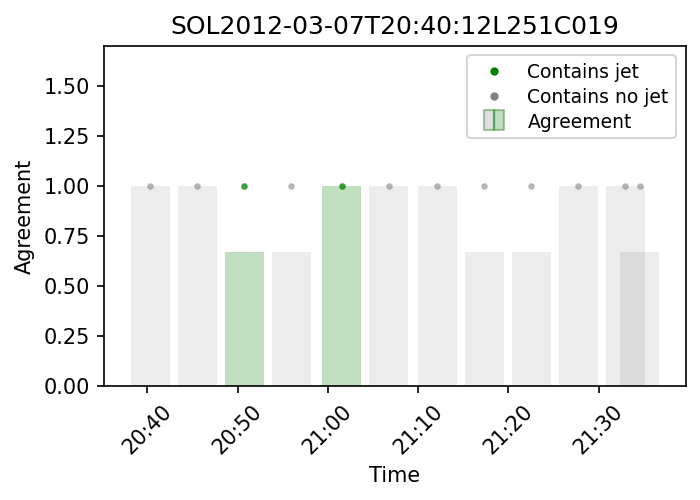

1904


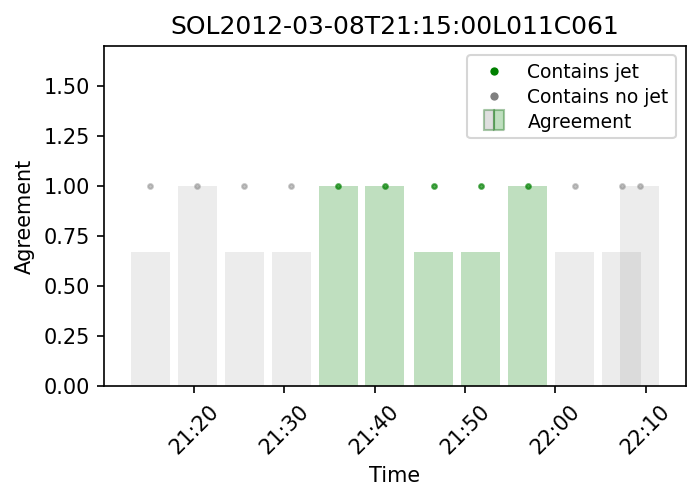

1916


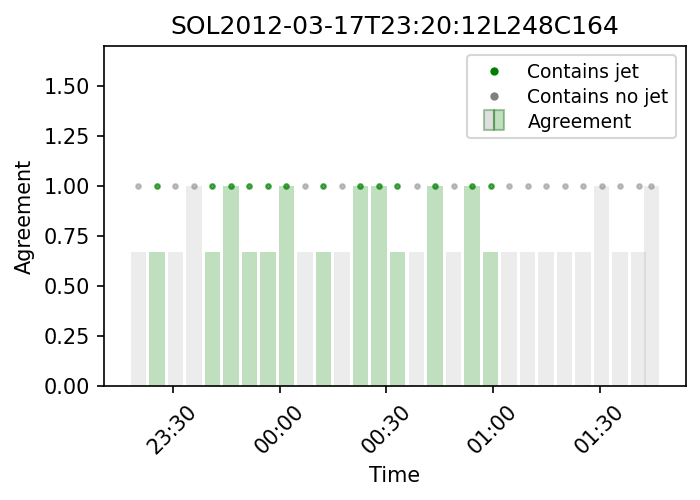

1945


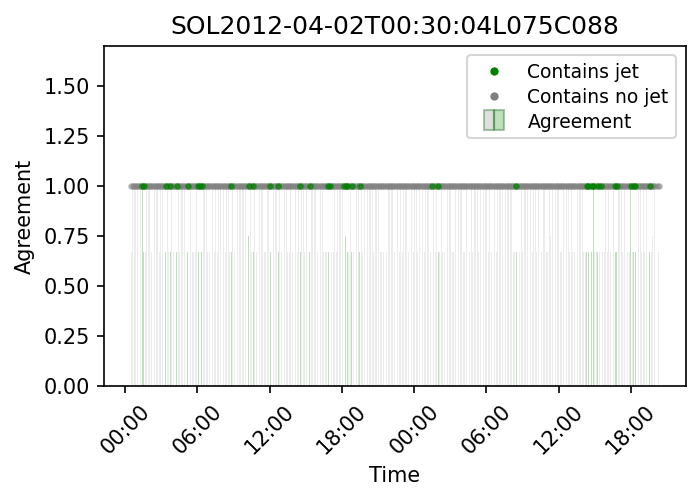

2282


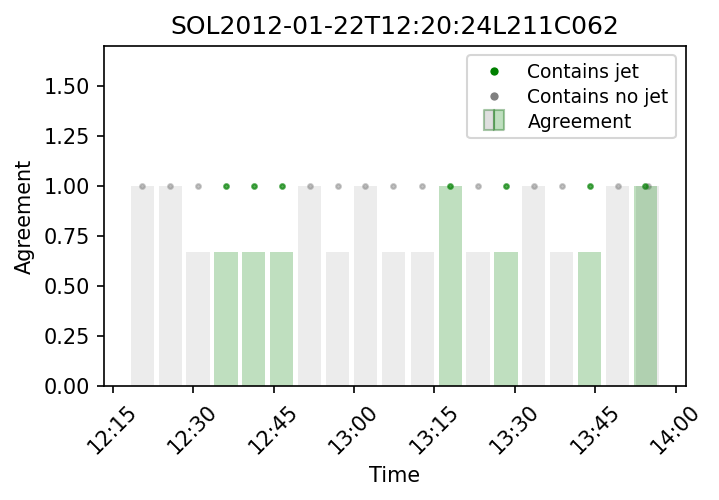

2302


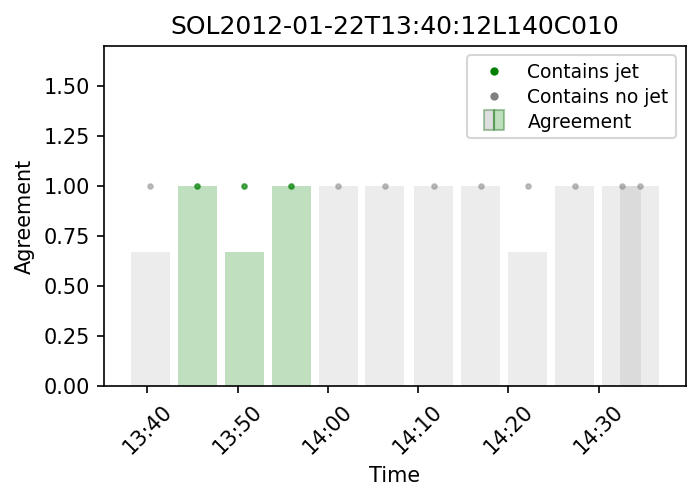

2314


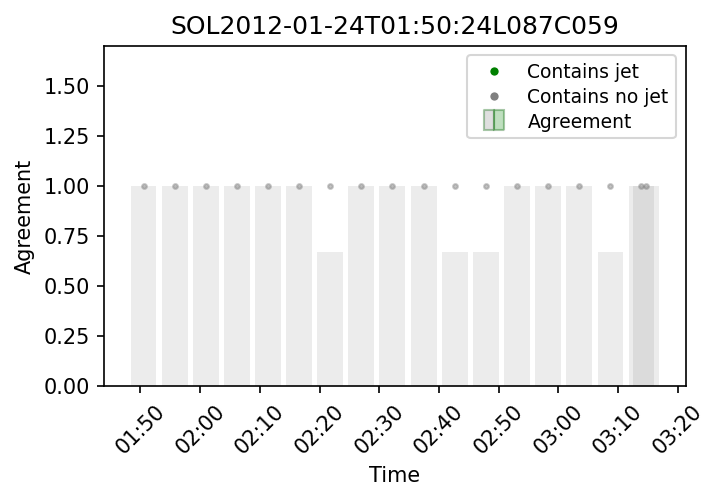

2332


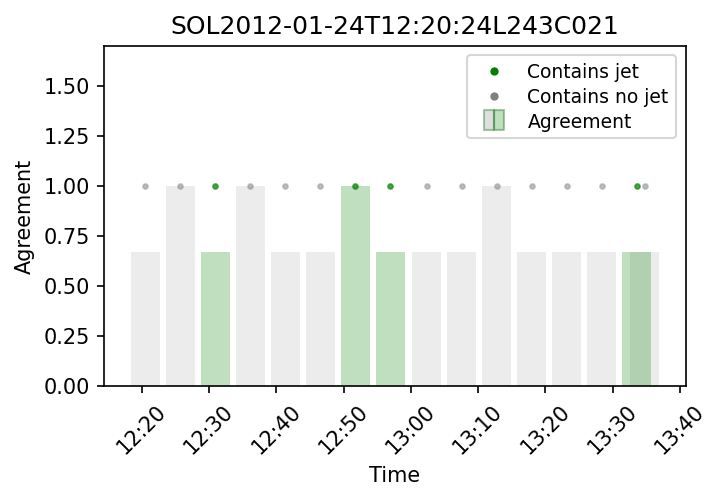

2348


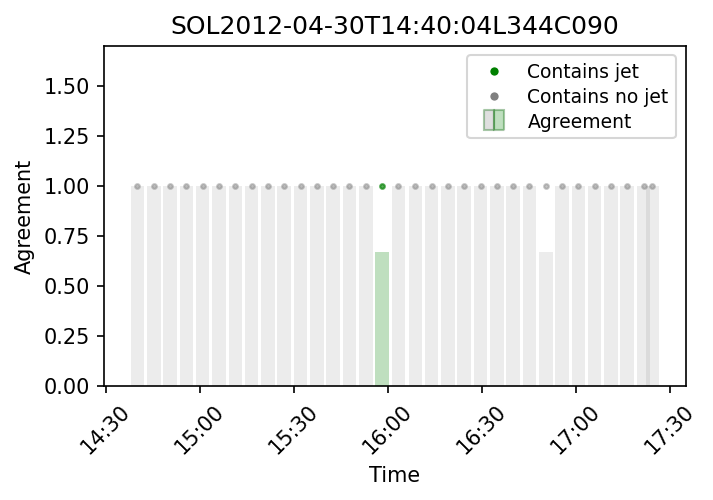

2381


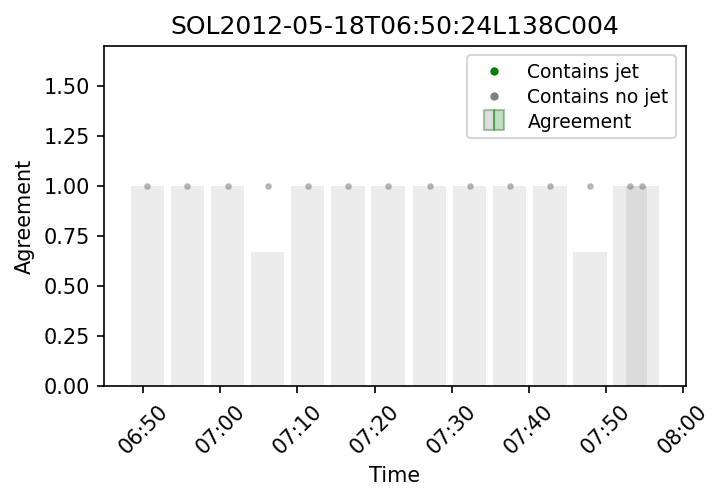

2395


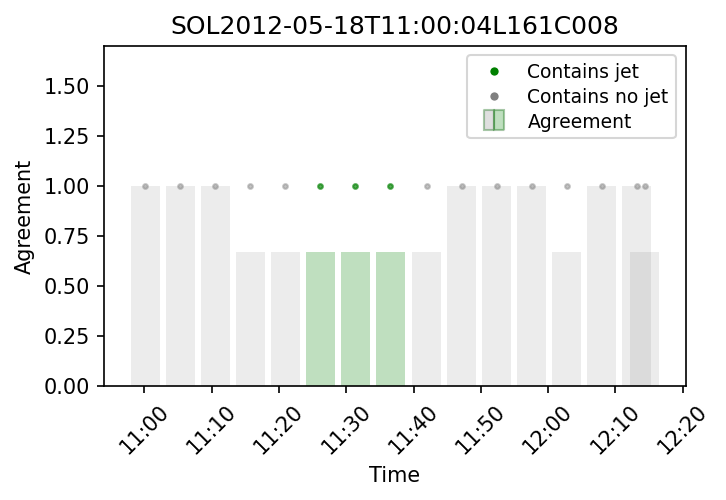

2411


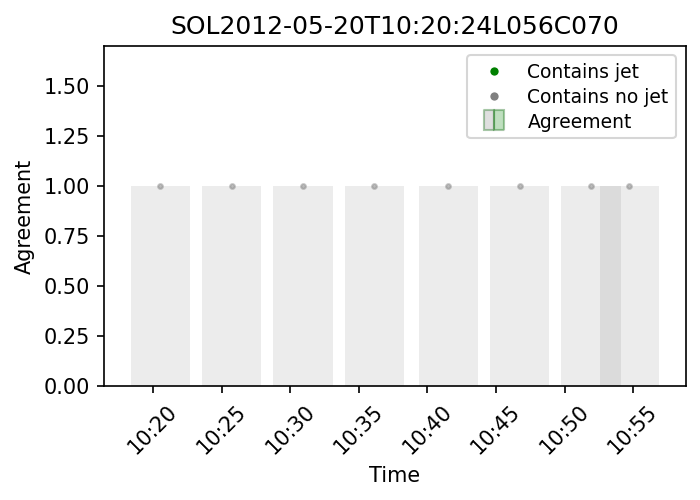

2419


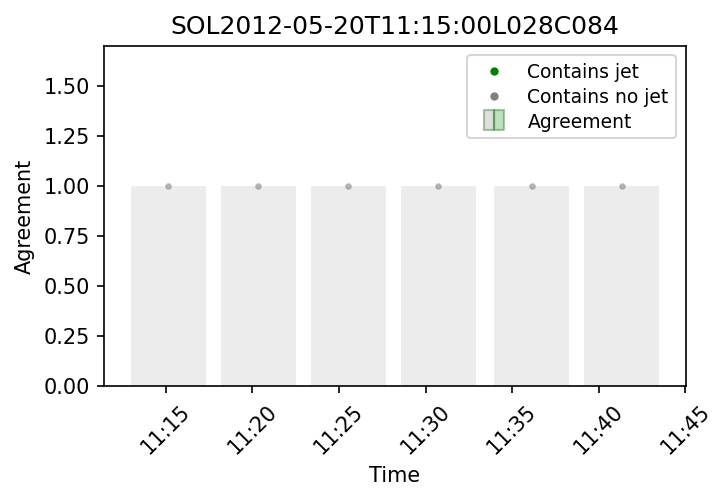

2425


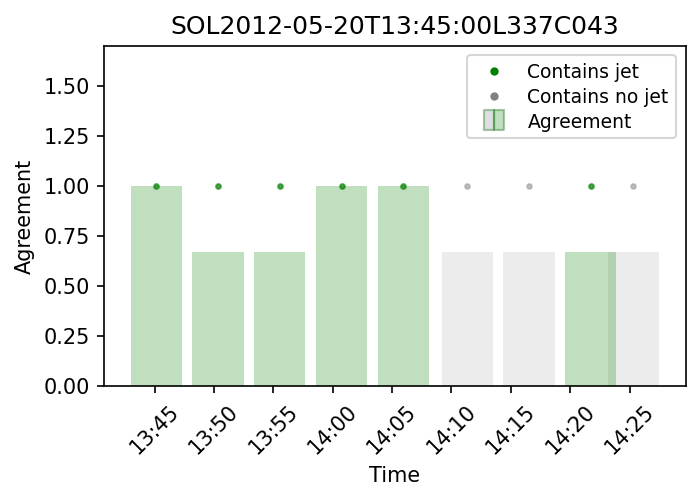

2434


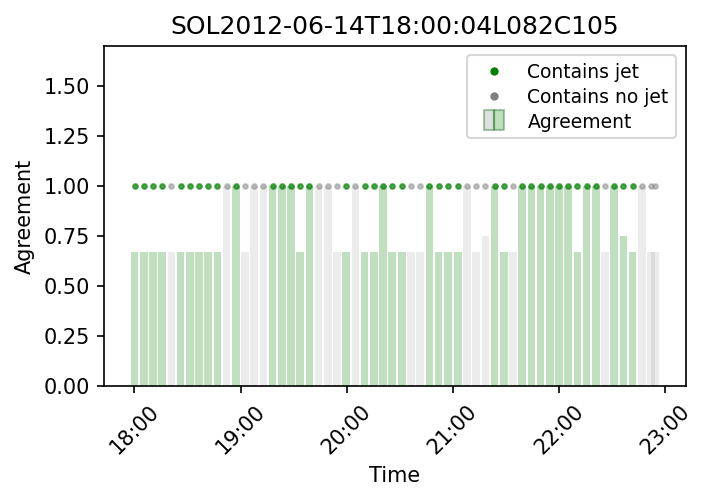

2492


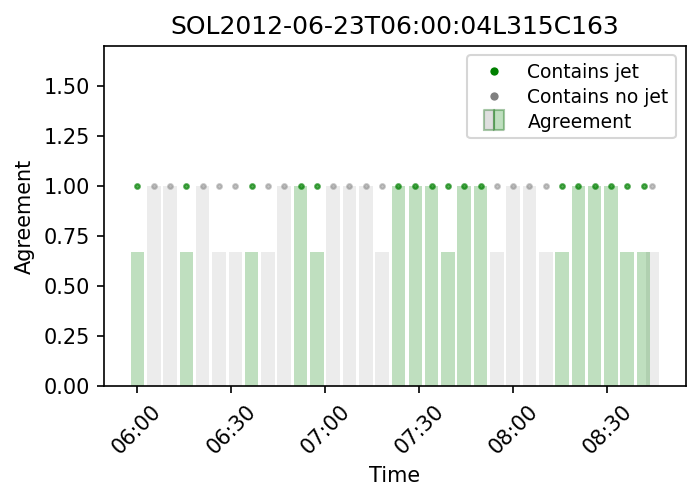

2525


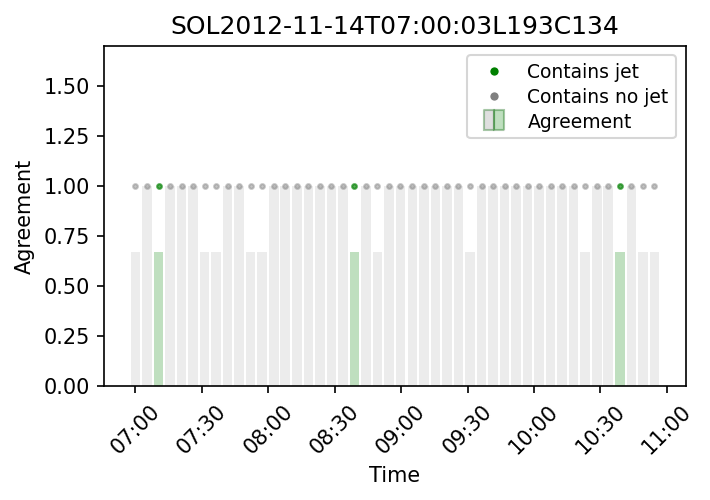

2571


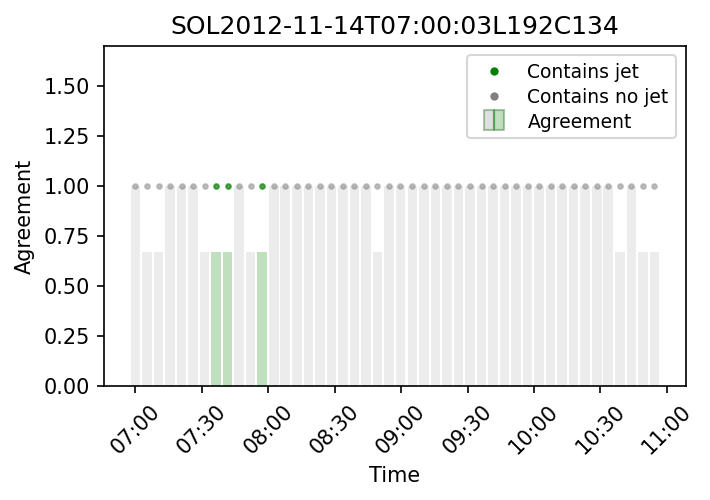

2617


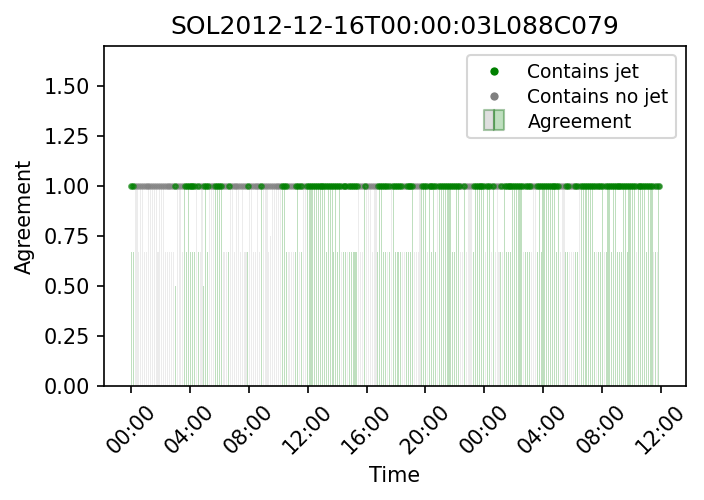

2894


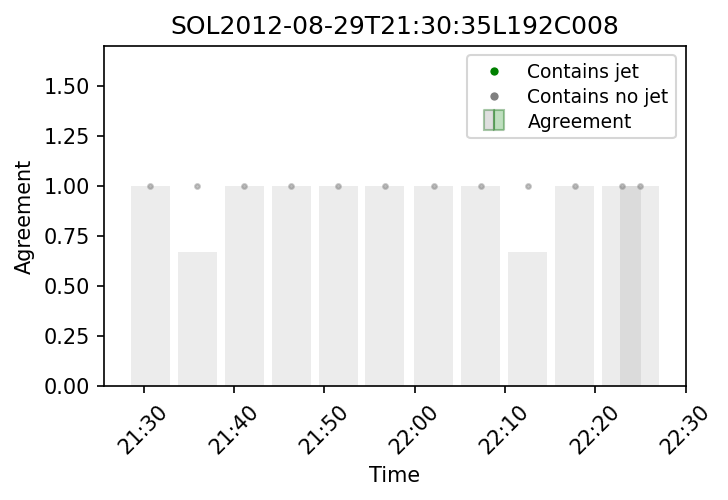

2906


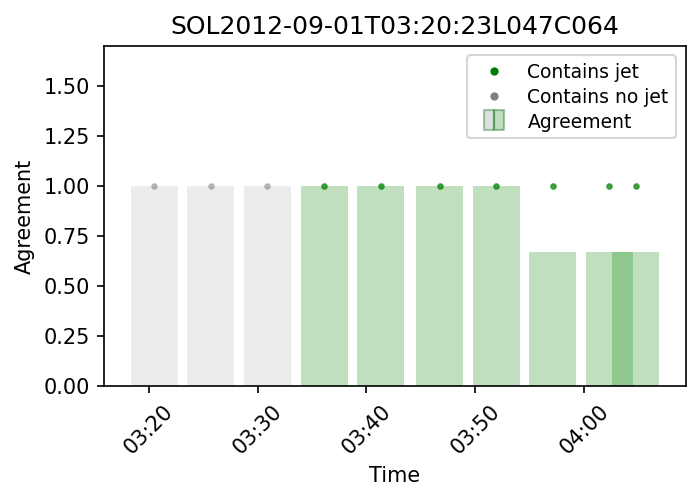

2916


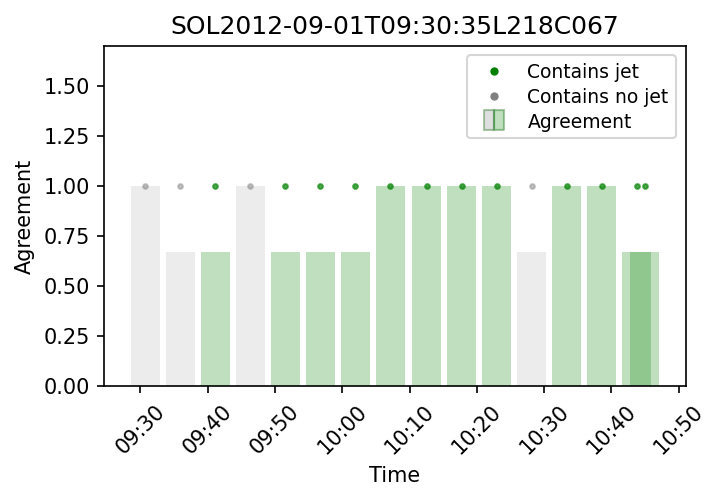

2932


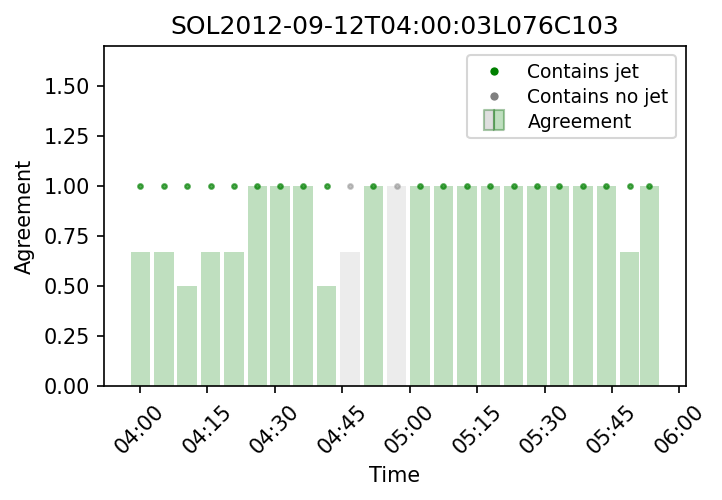

2955


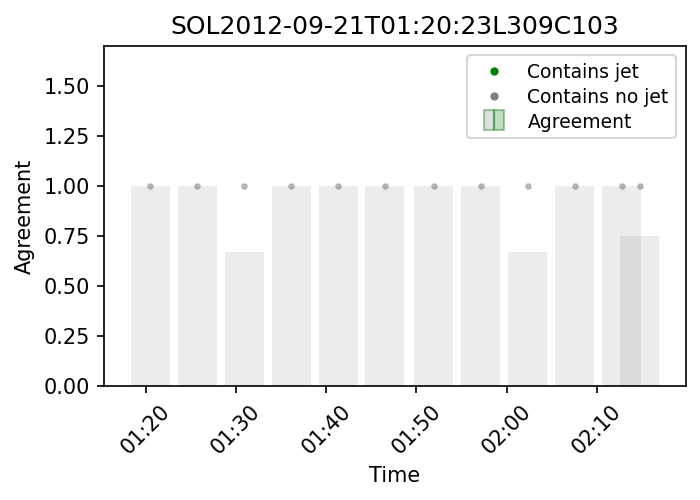

2967


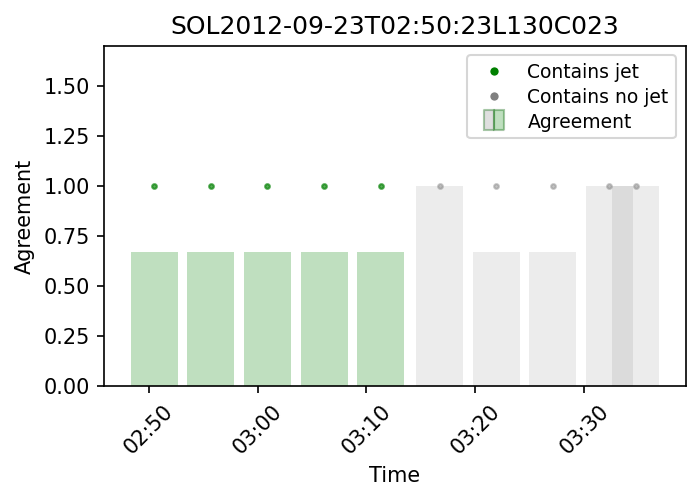

2977


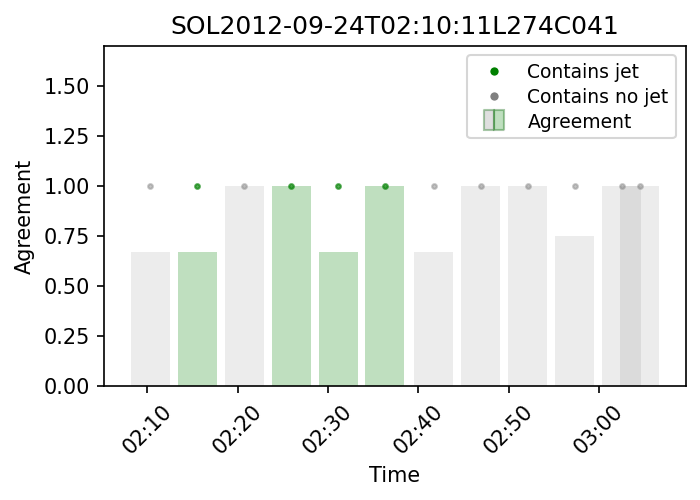

2989


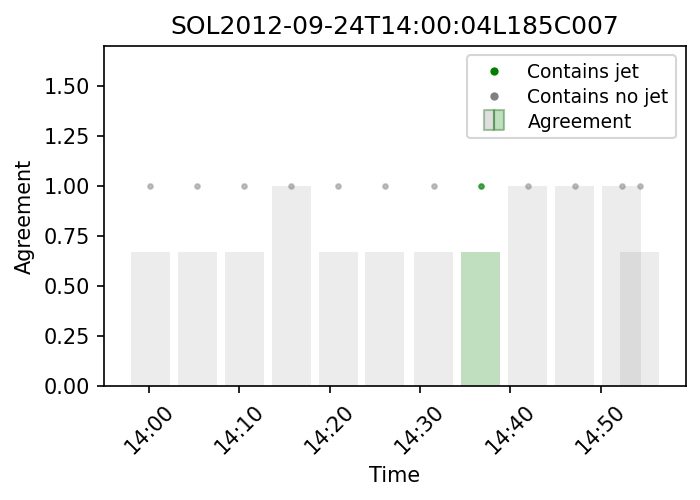

3001


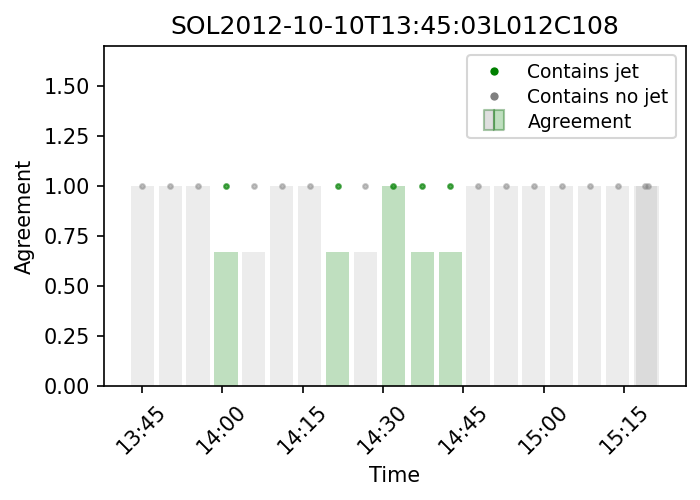

3021


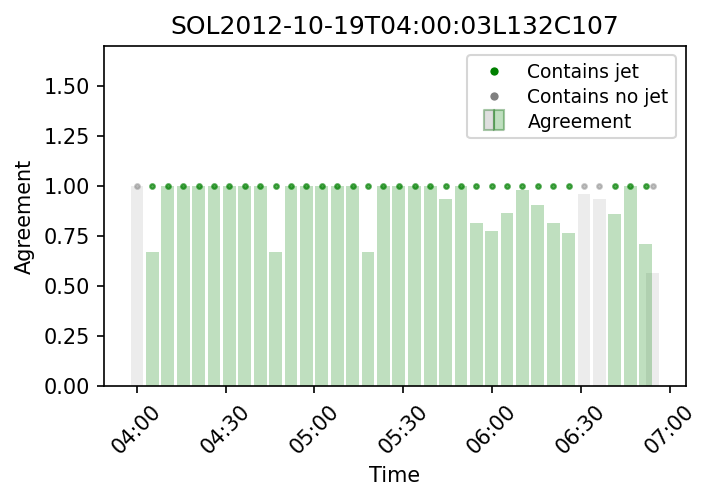

3056


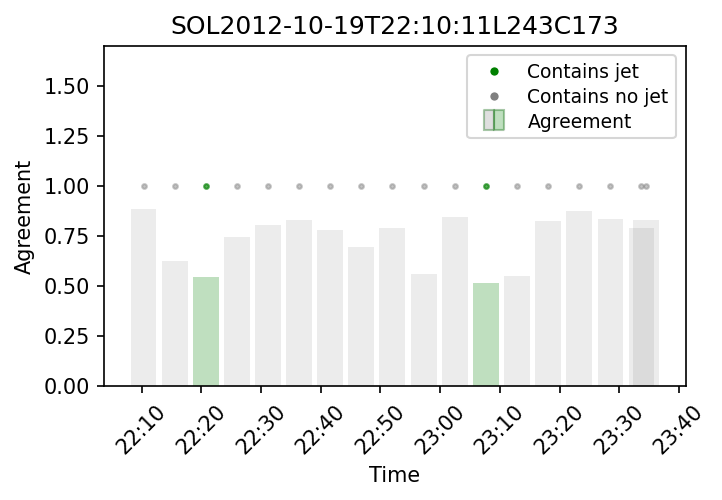

3074


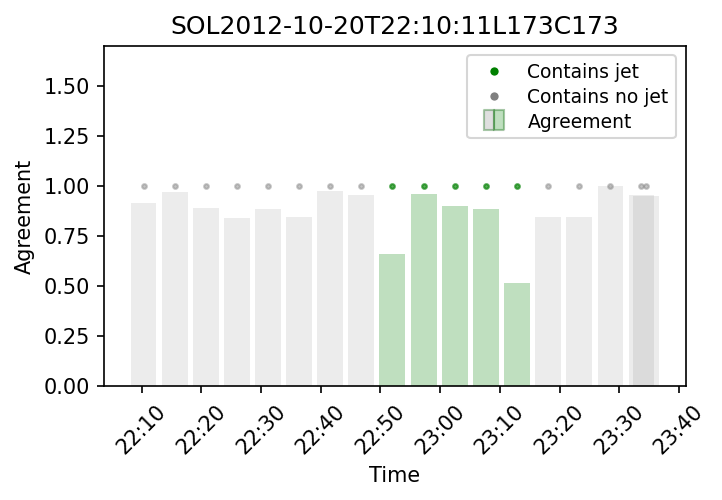

3092


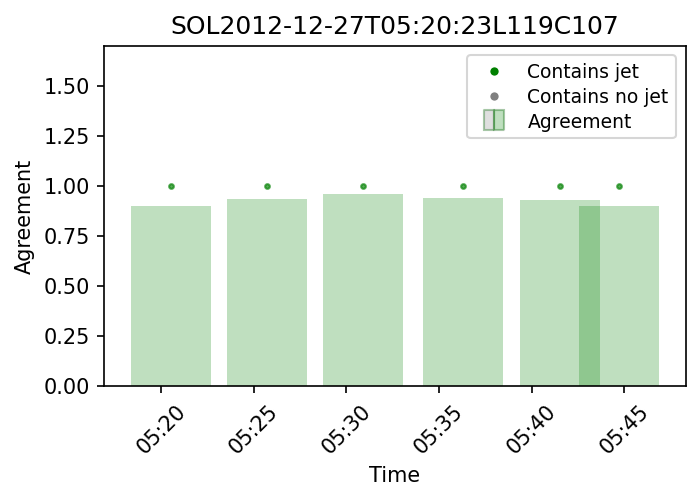

3098


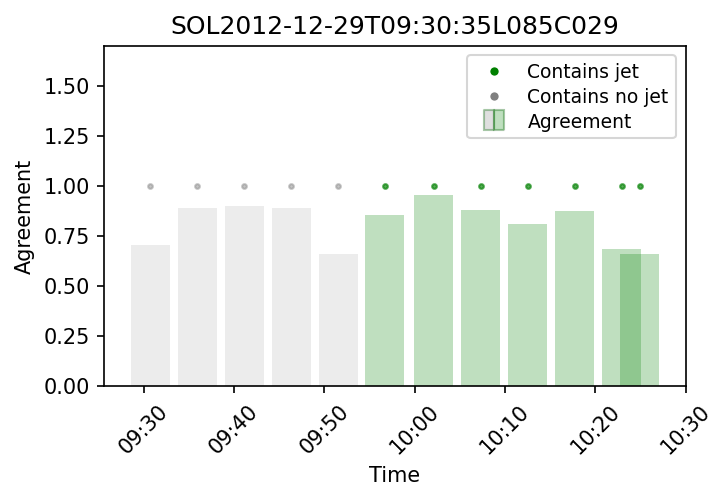

3110


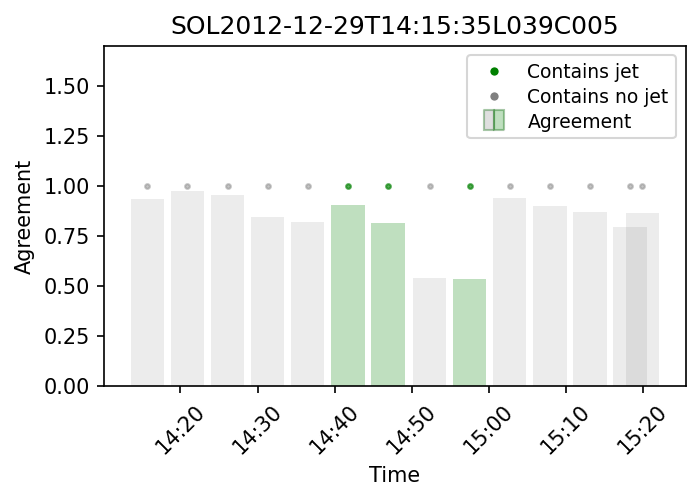

3124


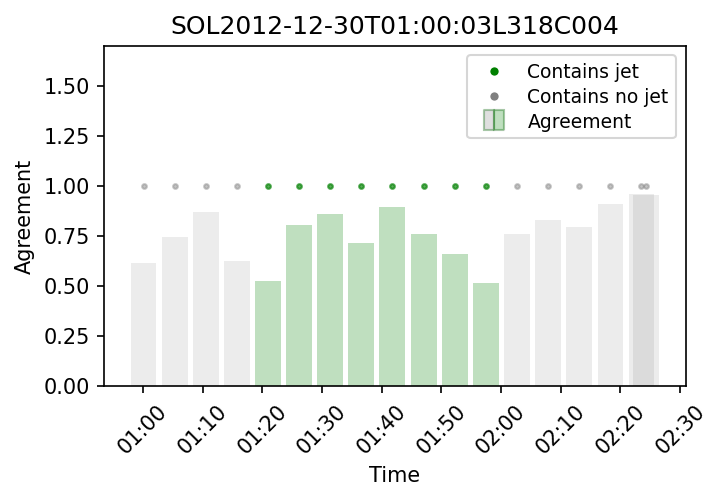

3142


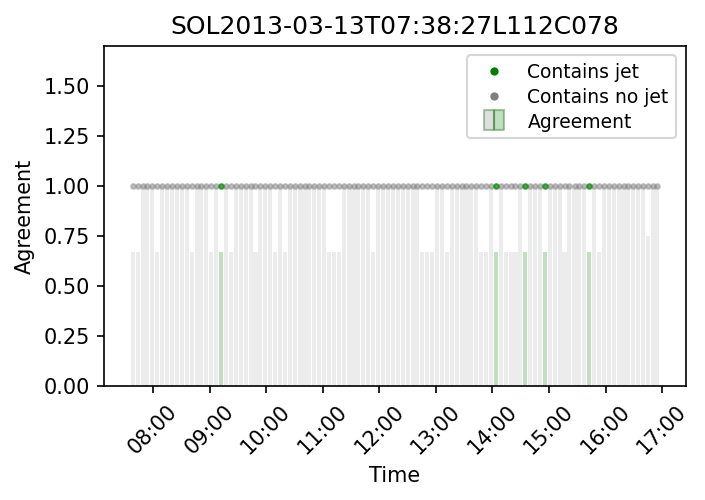

3250


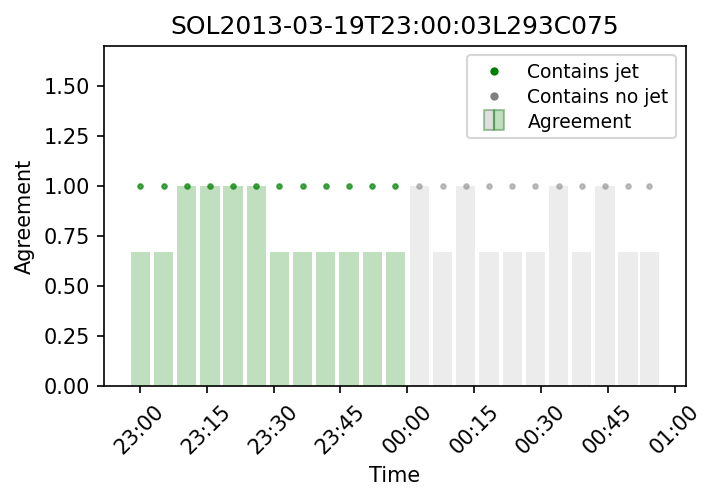

3273


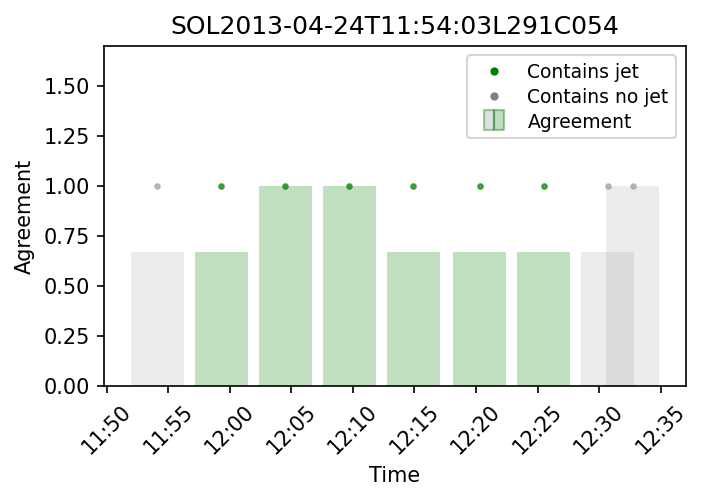

3282


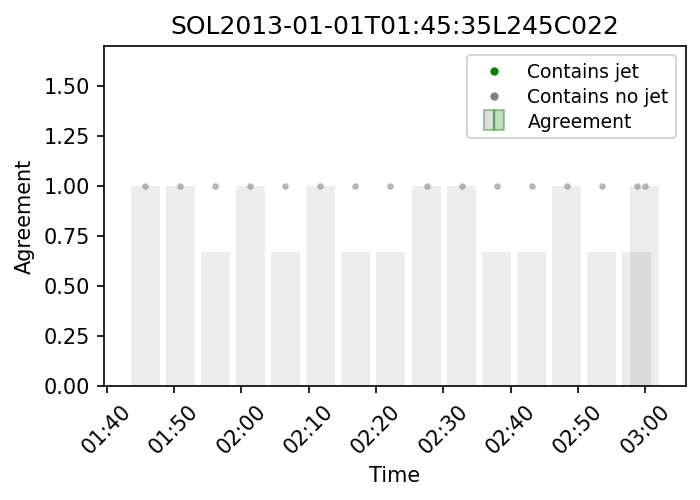

3298


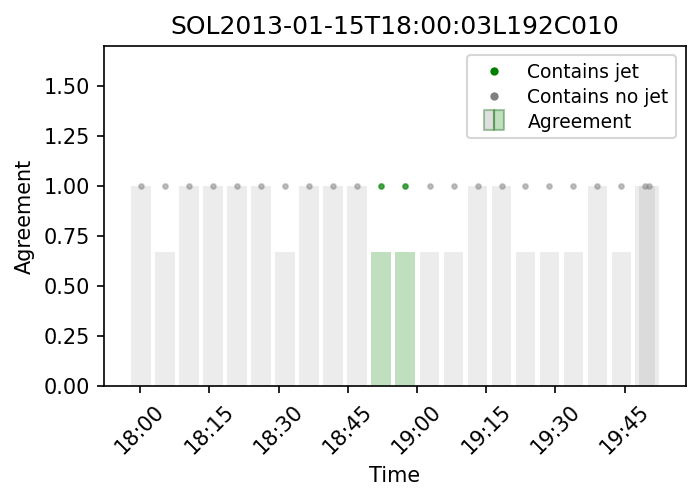

3321


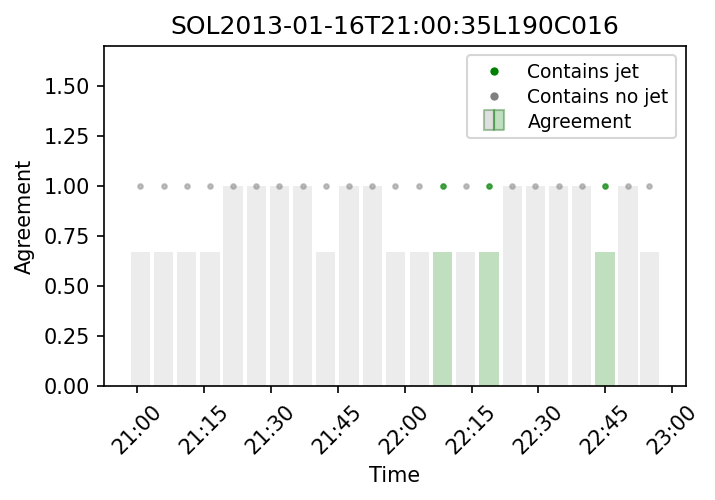

3344


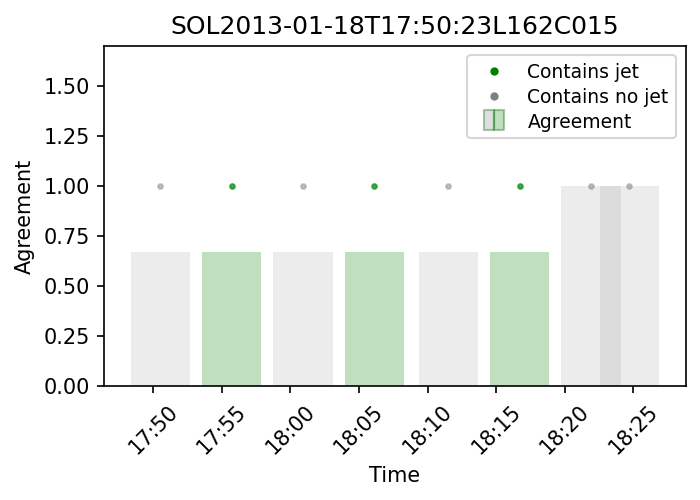

3352


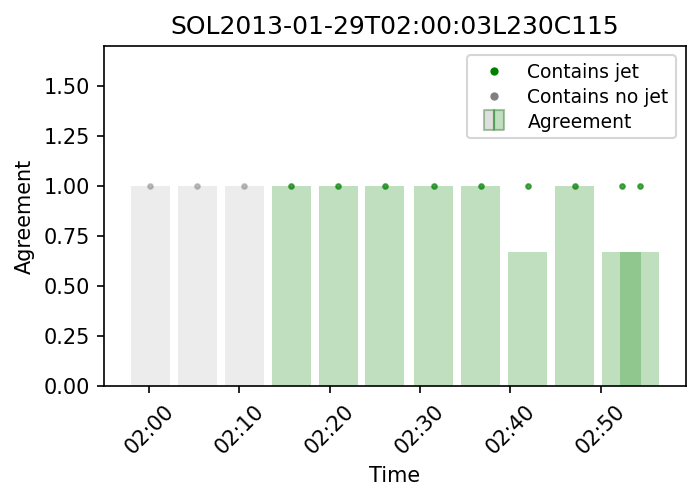

3364


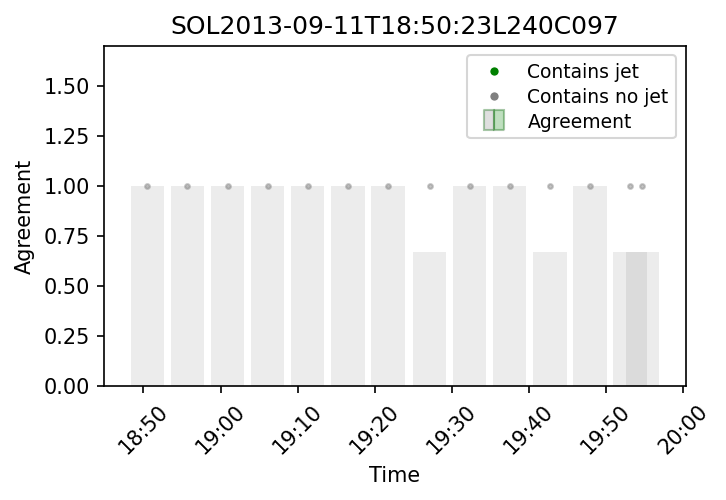

3378


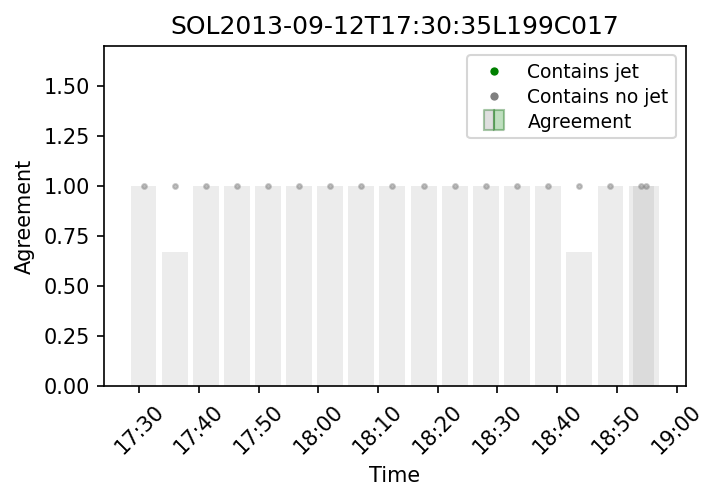

3396


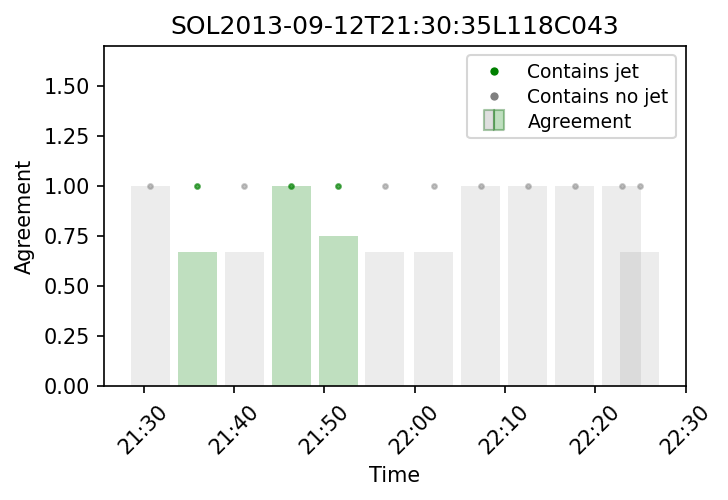

3408


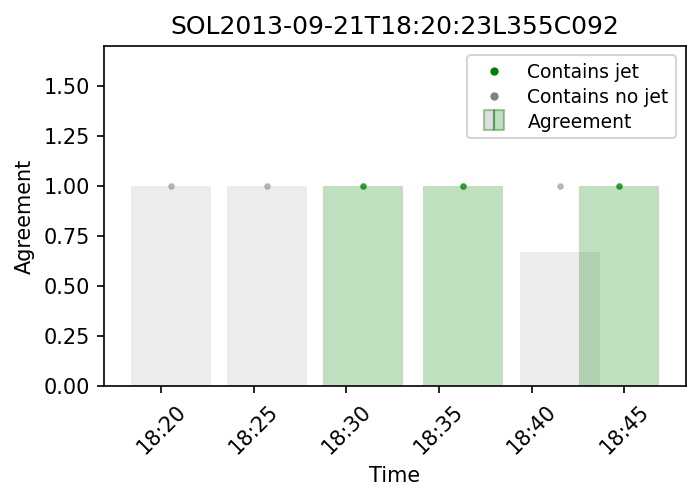

3414


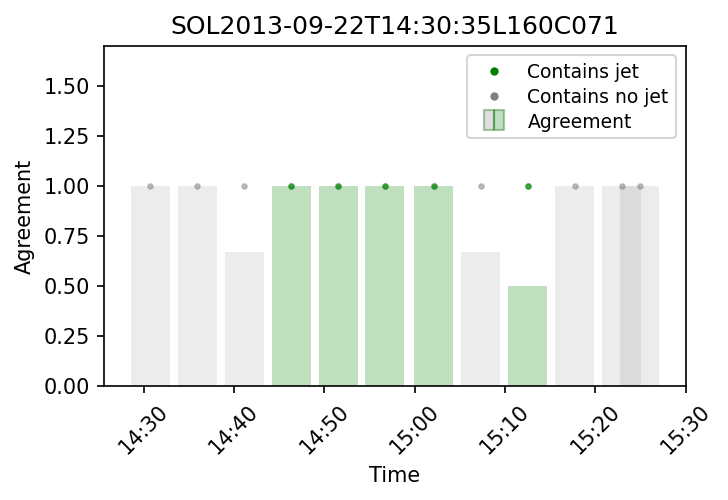

3426


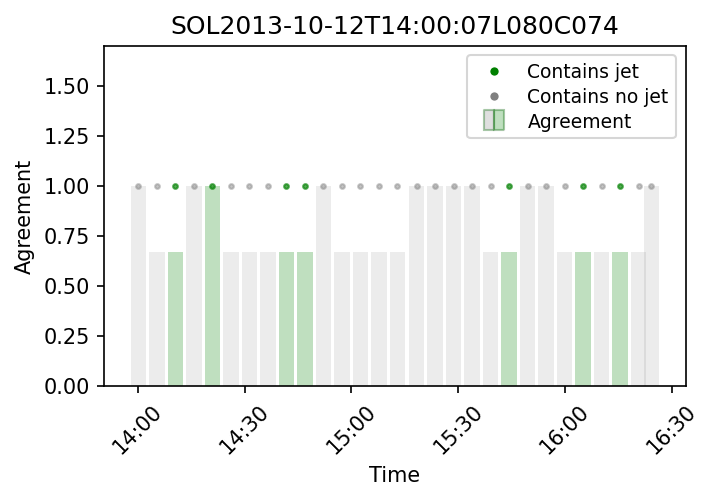

3455


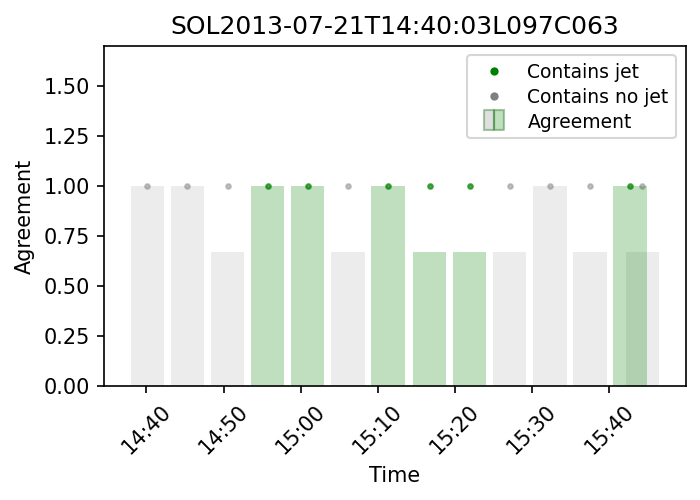

3469


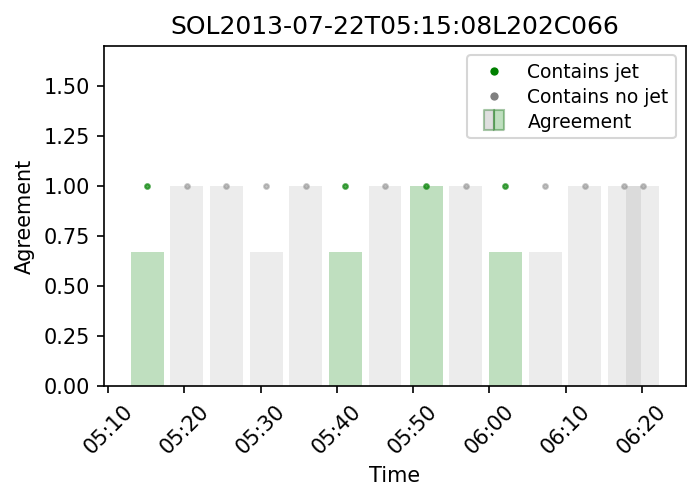

3483


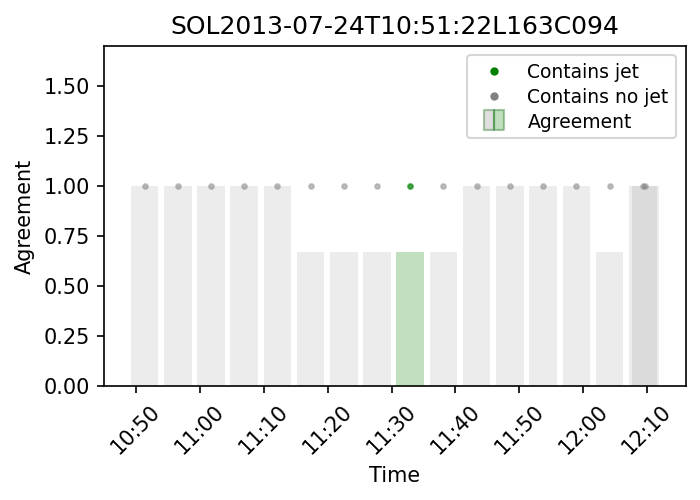

3500


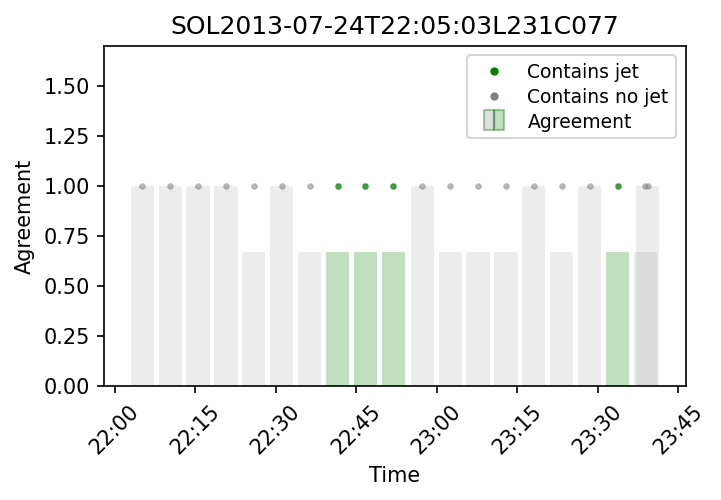

3520


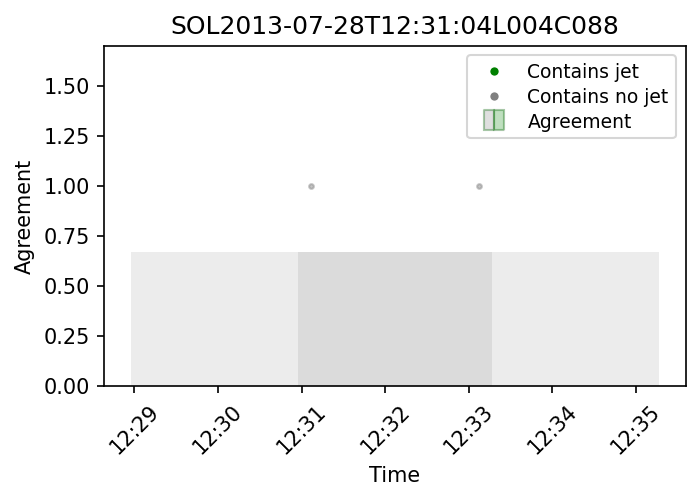

3522


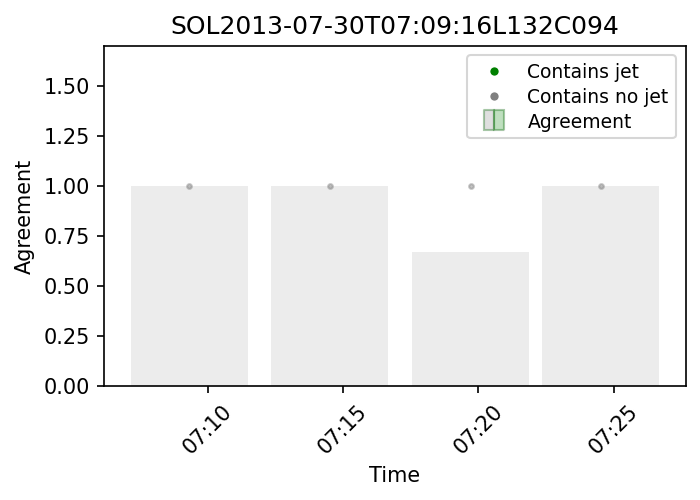

3526


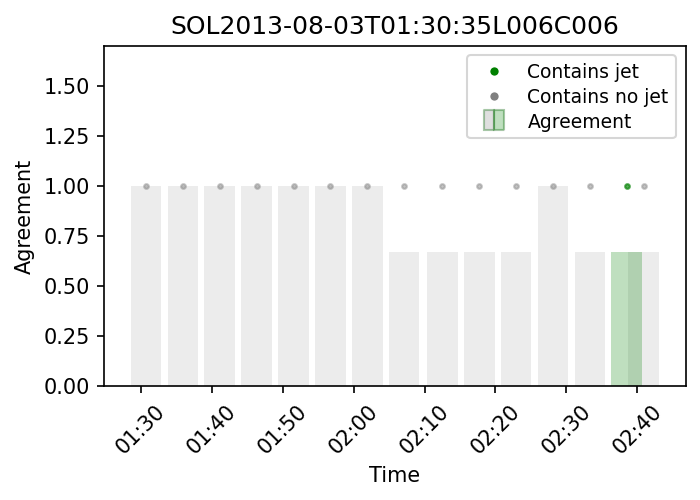

3541


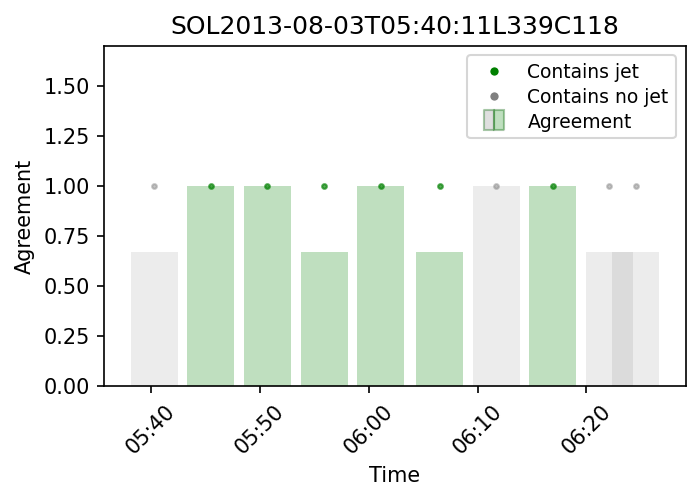

3551


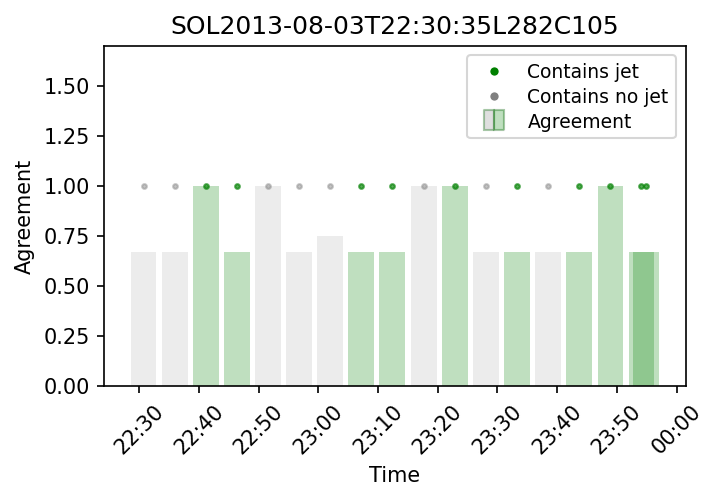

3569


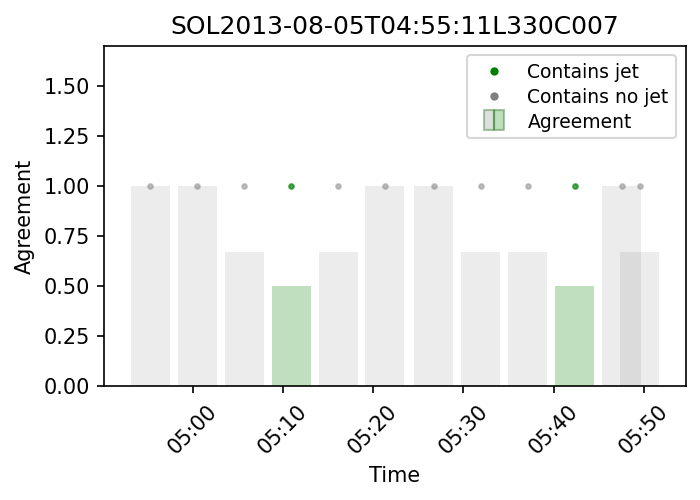

3581


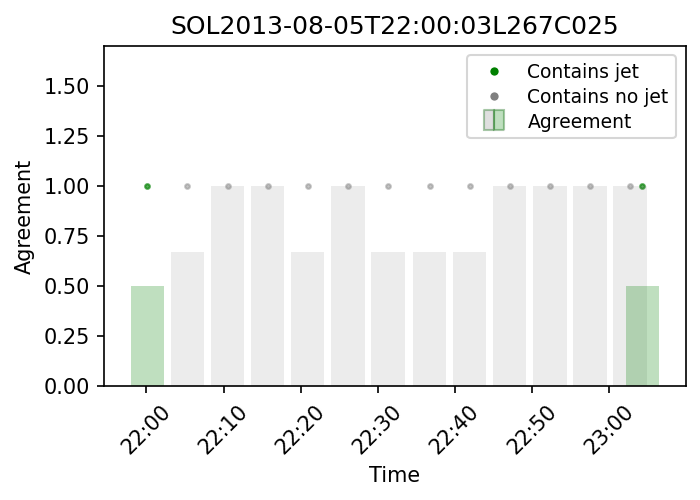

3595


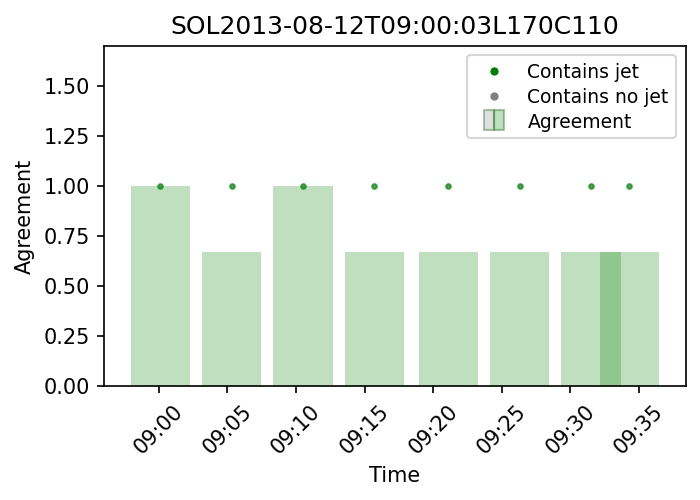

3603


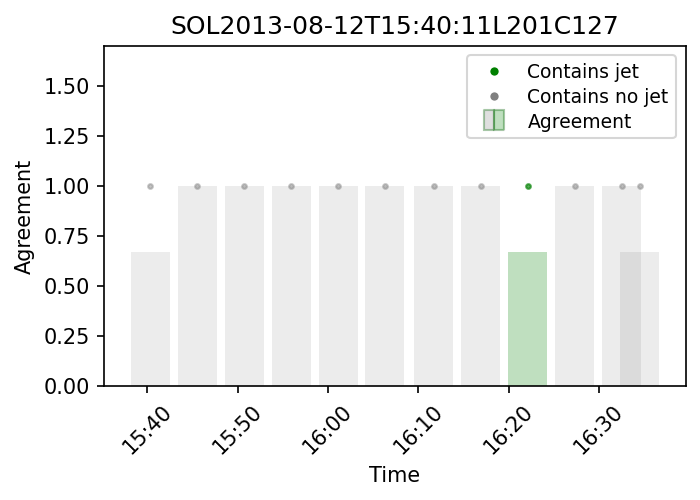

3615


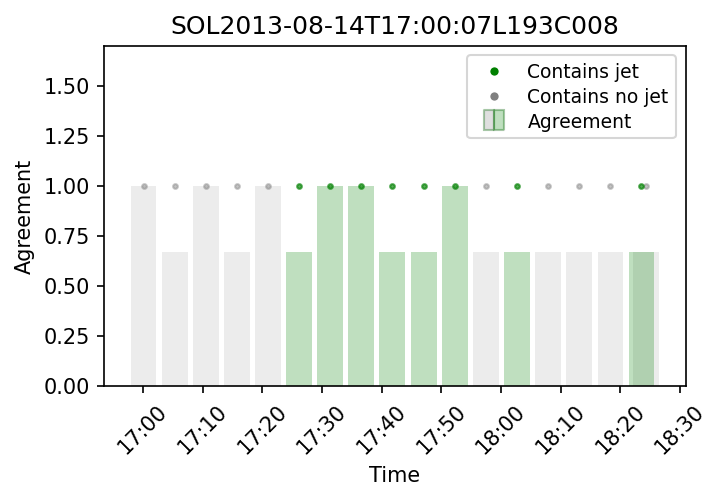

3633


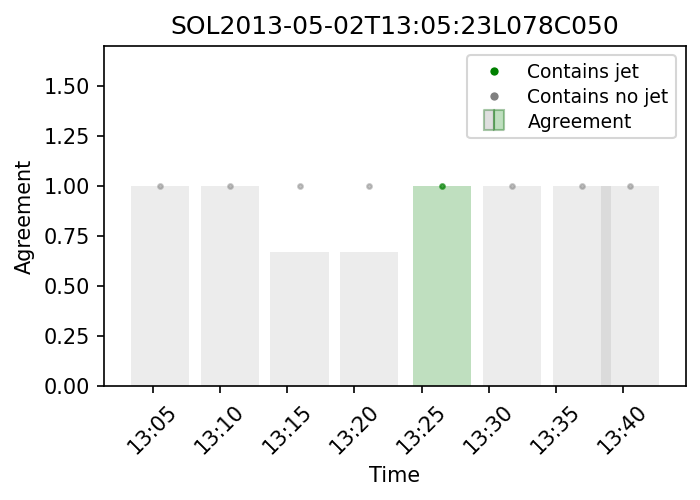

3641


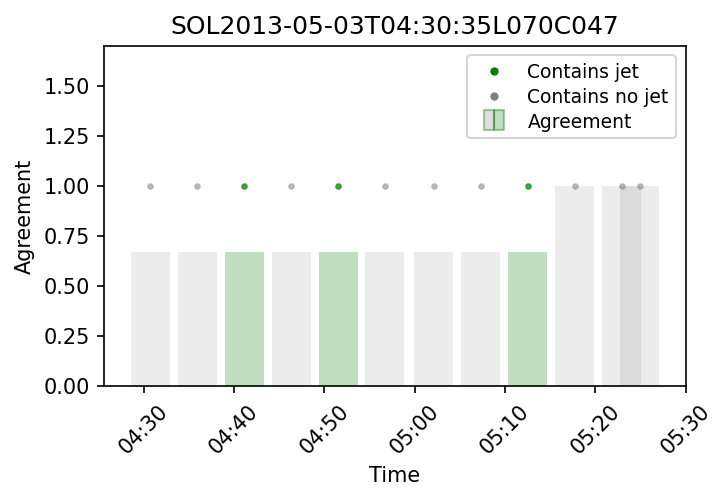

3653


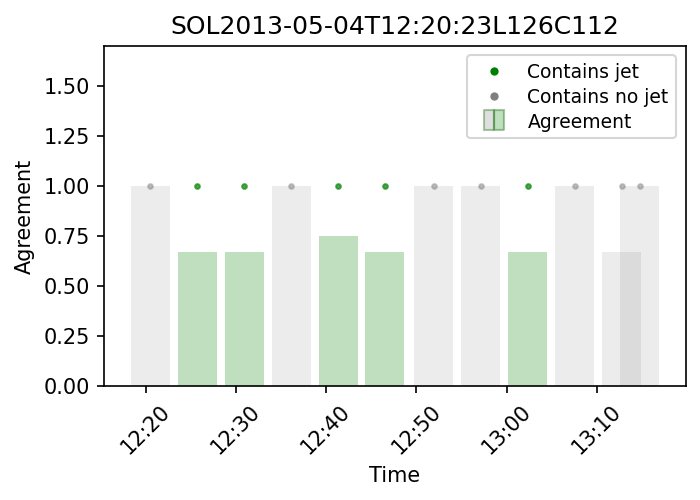

3665


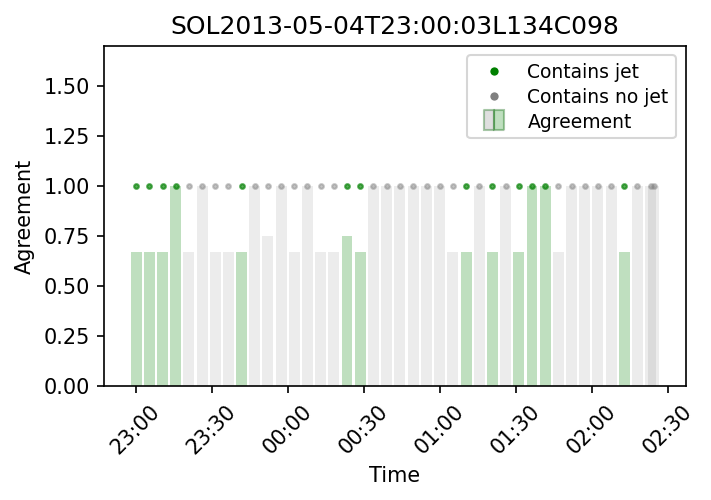

3706


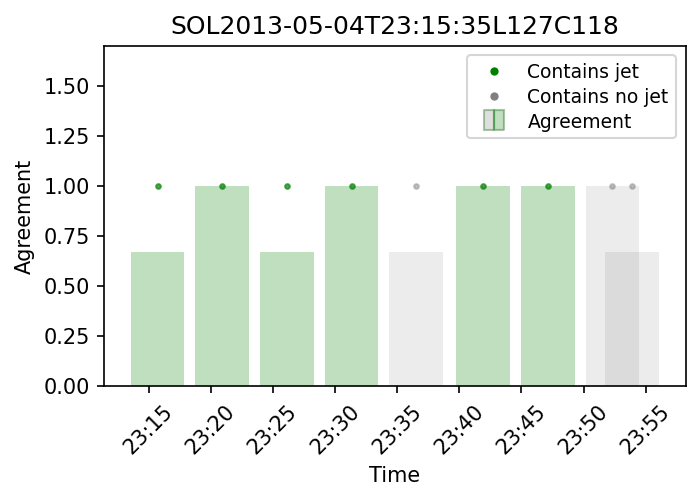

3715


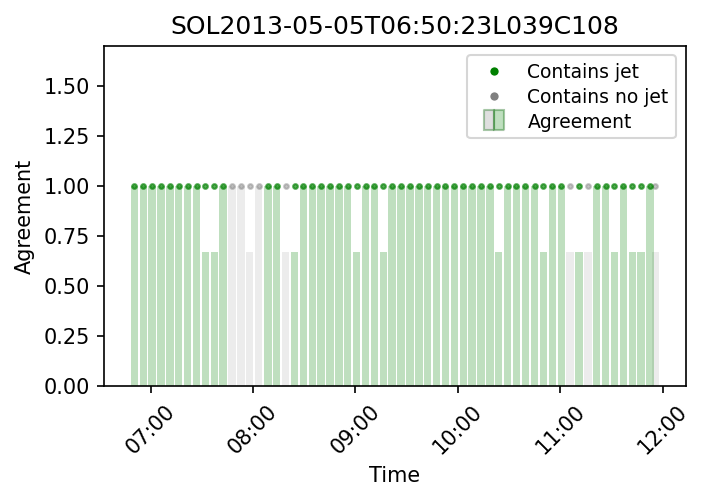

3775


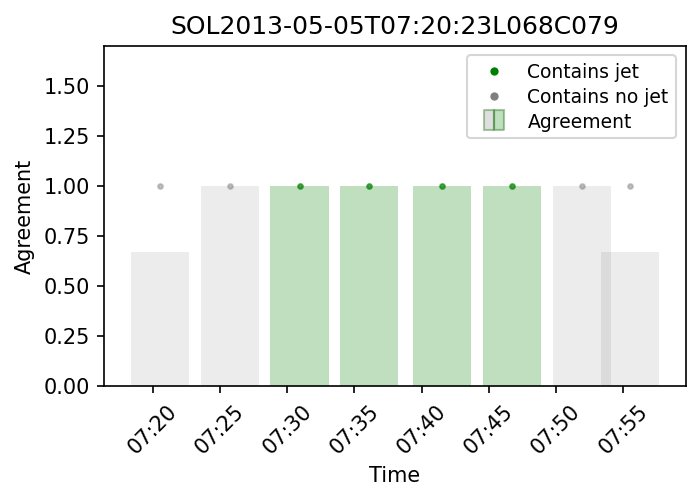

3783


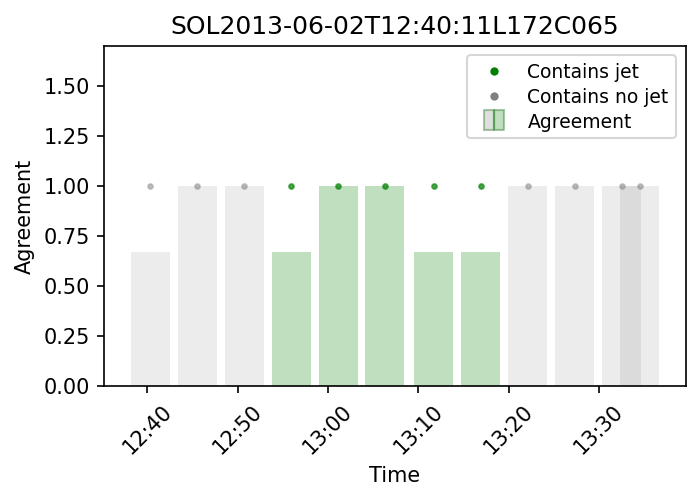

3795


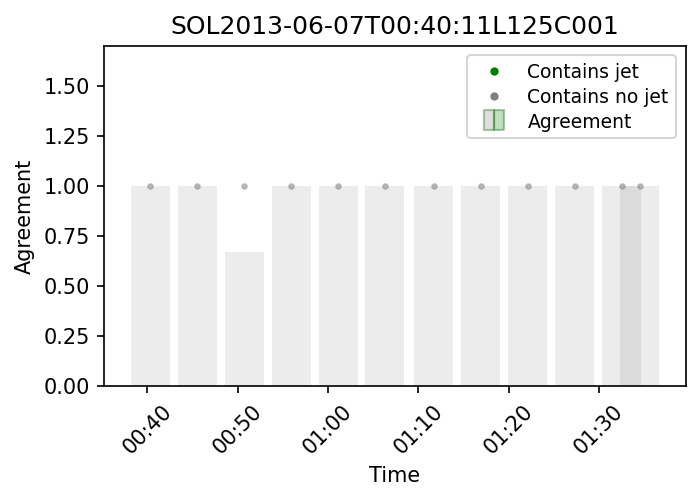

3807


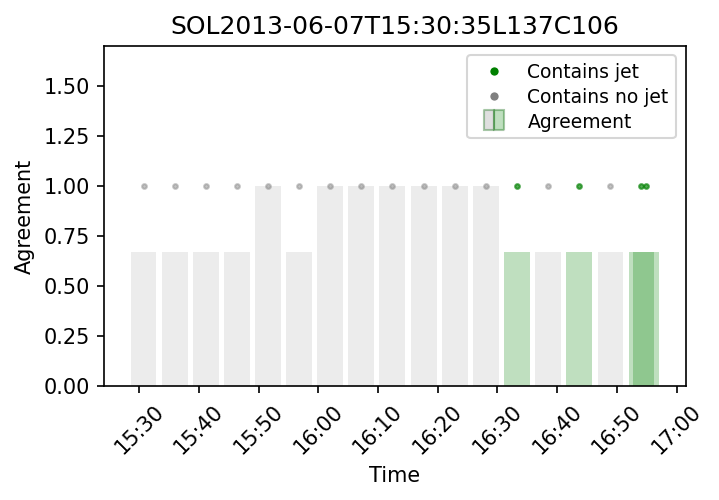

3825


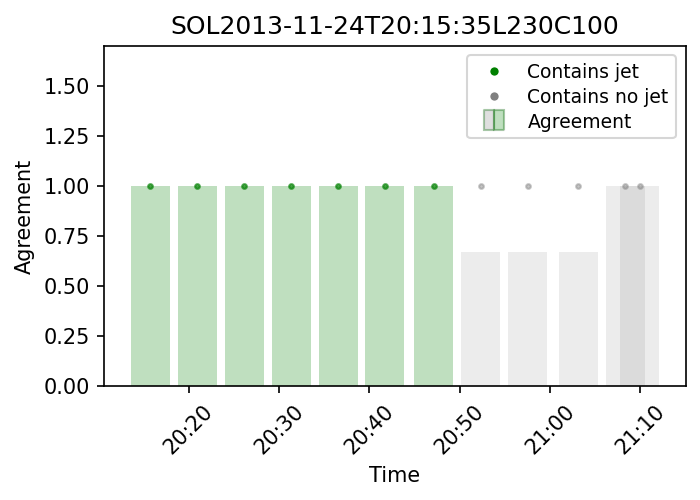

3837


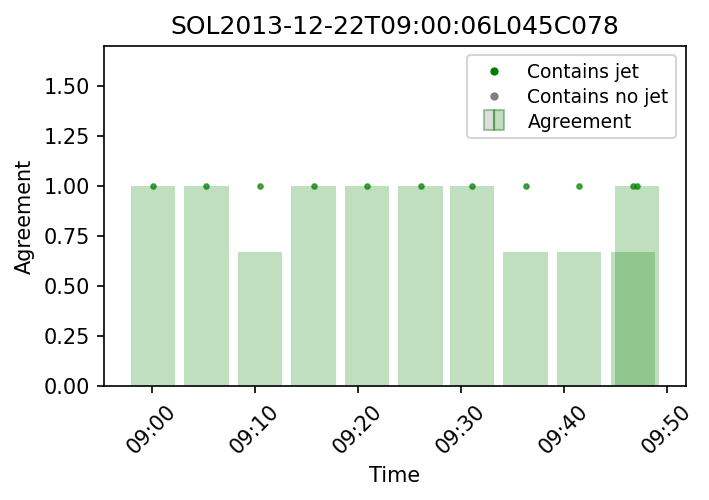

3848


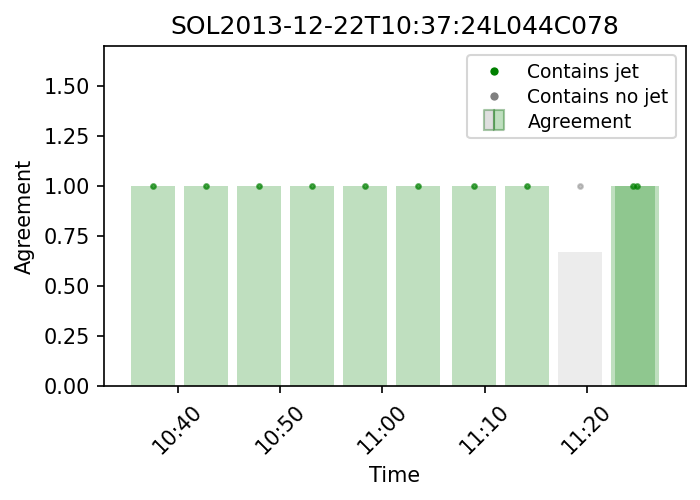

3859


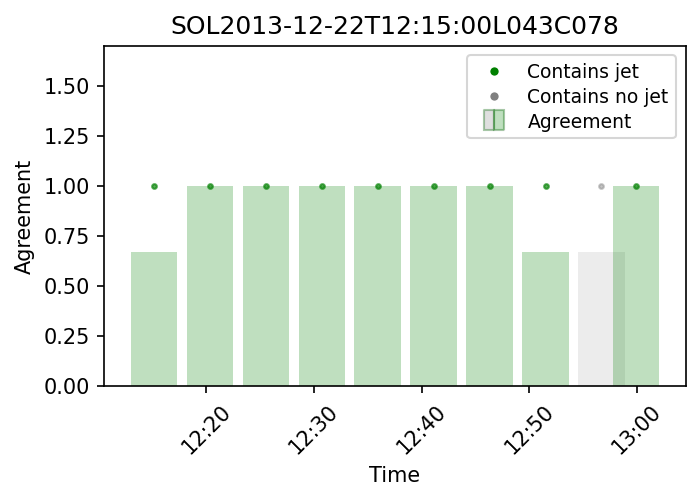

3869


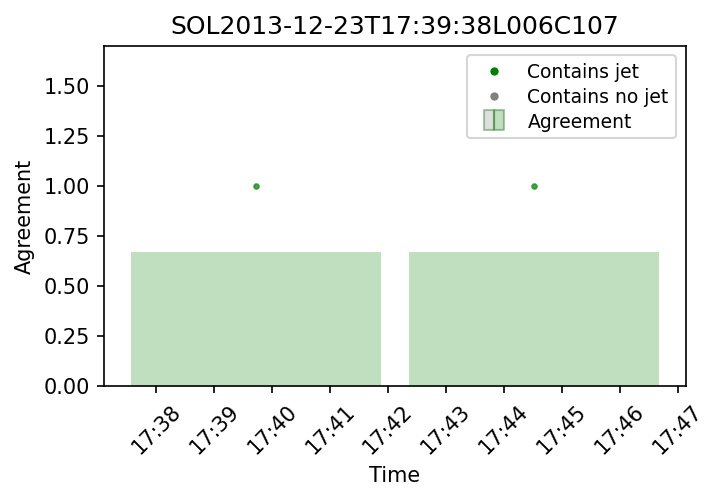

3871


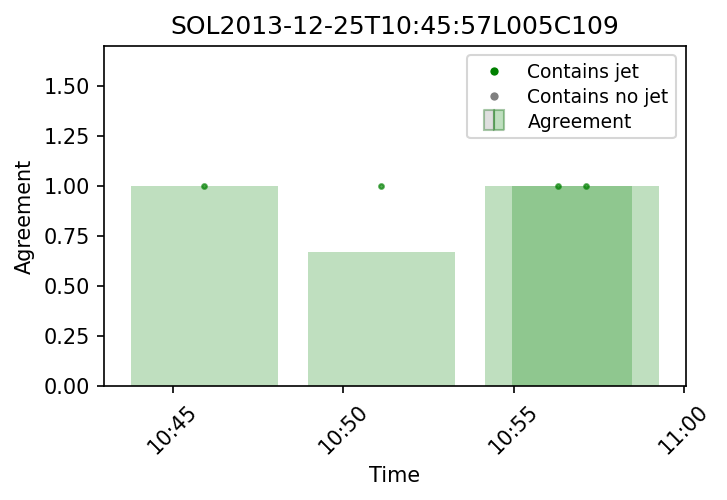

3875


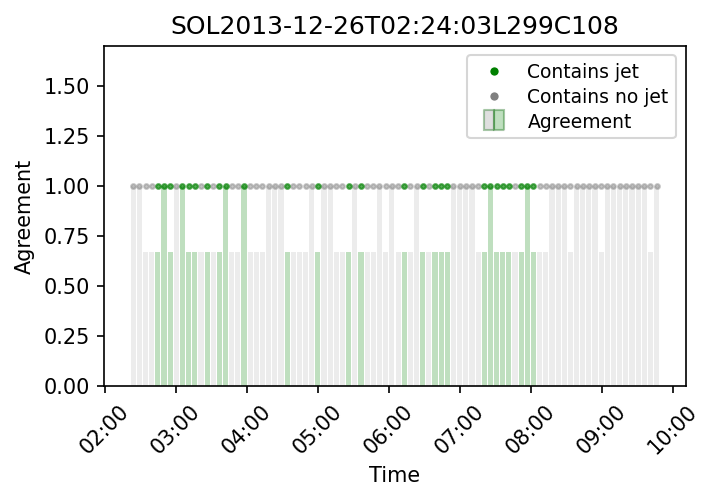

In [4]:
non_jet_mask=ans=='n'
jet_mask=ans=='y'
start_i=0
while start_i<len(subject_sol):
    I=subject_sol==subject_sol[start_i]
    print(start_i)

    fig, ax = plt.subplots(dpi=150,figsize=(5,3))
    try: 
        plt.bar(obs_time[non_jet_mask&I],agreement[non_jet_mask&I],width=0.003, alpha=0.15,color='grey')
        plt.scatter(obs_time[non_jet_mask&I],[1]*len(obs_time[non_jet_mask&I]),color="grey", alpha=0.45, s=5)
    except:
        print('happens') #Not printed so if only yes jets this try execept does not work breaking the plot
        pass

    try:
        plt.bar(obs_time[jet_mask&I],agreement[jet_mask&I],width=0.003, alpha=0.25,color='green')
        plt.scatter(obs_time[jet_mask&I],[1]*len(obs_time[jet_mask&I]),color="green", alpha=0.65, s=5)
    except:
        print('No jets in this event')

    date_form = DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation=45)
    plt.title(subject_sol[start_i])
    plt.xlabel('Time')
    plt.ylabel('Agreement')
    plt.ylim(0,1.7)
    #Legend
    d1 = Line2D([0], [0], marker='o', color='w',markerfacecolor='green', markersize=5)
    d2 = Line2D([0], [0], marker='o', color='w',markerfacecolor='grey', markersize=5)
    m3, = ax.plot([], [], c='grey' ,alpha=0.25, marker='s', markersize=10,
              fillstyle='left', linestyle='none')
    m4, = ax.plot([], [], c='green' ,alpha=0.25, marker='s', markersize=10,
              fillstyle='right', linestyle='none')
    ax.legend(((d1),(d2), (m3, m4)), ('Contains jet', 'Contains no jet','Agreement'), numpoints=1, labelspacing=0.3,
          loc='upper right', fontsize=9)
    #
    plt.savefig('SOL/Agreement_SOL_T0/'+subject_sol[start_i].replace(':','-')+'.png',bbox_inches="tight")
    plt.show()
    start_i=np.max(np.where(I==True))+1
